# **1. Pendahuluan**

### **Latar Belakang**

Sebuah supermarket bernama **JAYA SUPERMARKET** menyediakan berbagai macam produk untuk tiap kalangan, mulai dari buah-buahan, ikan, hingga wine. Selama ini, cara promosi JAYA SUPERMARKET sering sekali kurang tepat sasaran karena tidak mengerti bagaimana karakteristik pelanggannya. Tim Marketing harus memahami karakteristik pelanggan dan apa produk yang paling diminati oleh pelanggannya karena dalam waktu dekat, JAYA SUPERMARKET ingin meluncurkan suatu produk baru berdasarkan kategori yang paling diminati. 

### **Pernyataan Masalah**
Untuk mencapai tingkat penjualan yang optimal dan memastikan peluncuran produk baru berhasil, JAYA SUPERMARKET perlu mengidentifikasi dan memahami secara mendalam karakteristik dan preferensi pelanggan yang berpotensi sehingga dengan adanya informasi ini bisa memudahkan mereka untuk melakukan komunikasi dengan baik ketika hendak meluncurkan produk terbarunya. 

Sebagai seorang Data Analyst, kita akan mencoba menjawab pertanyaan berikut: 
1. Bagaimana karakteristik pembeli dari setiap kategori produk?
2. Siapa pelanggan yang paling konsumtif?
2. Produk apa yang paling diminati?
3. Channel pemasaran apa yang paling efektif untuk menjangkau target pelanggan untuk produk baru?

### **Stakeholder**

Para pemangku kepentingan dalam kasus ini adalah **Manajer** dan **Tim Pemasaran** dari JAYA SUPERMARKET. Hasil dari analisis diharapkan dapat membantu manajer dan tim pemasaran JAYA SUPERMARKET dalam mengambil keputusan.

### **Key Atributes**

Dataset ini berisi tentang data pelanggan yang berbelanja di supermarket. Dataset ini dibagi menjadi 4 kategori. Kategori Data pribadi berisi tentang data pribadi pelanggan, Kategori Produk berisi tentang produk yang dibeli oleh pelanggan dalam 2 tahun terakhir, Kategori Promosi berisi tentang informasi promo harga yang dipilih oleh pelanggan, dan kategori Tempat yang berisi informasi tempat pelanggan melakukan transaksi.

People

- ID: Nomor unik untuk identifikasi pelanggan
- Year_Birth: Tahun lahir pelanggan
- Education: Tingkat pendidikan pelanggan
- Marital_Status: Status pelanggan
- Income: Pemasukan tahunan pelanggan
- Kidhome: banyaknya anak yang dimiliki pelanggan
- Teenhome: banyaknya anak remaja yang dimiliki pelanggan
- Dt_Customer: Tanggal pelanggan terdaftar di Supermarket
- Recency: lamanya hari sejak terakhir kali pelanggan bertransaksi
- Complain: 1 apabila pelanggan melakukan komplain dalam 2 tahun terakhir, 0 jika tidak

Product

- MntWines: uang yang dikeluarkan untuk membeli wine dalam 2 tahun terakhir (dollar) 
- MntFruits: uang yang dikeluarkan untuk membeli buah dalam 2 tahun terakhir (dollar)
- MntMeatProducts: uang yang dikeluarkan untuk membeli daging dalam 2 tahun terakhir (dollar)
- MntFishProducts: uang yang dikeluarkan untuk membeli ikan dalam 2 tahun terakhir (dollar)
- MntSweetProducts: uang yang dikeluarkan untuk membeli manisan dalam 2 tahun terakhir (dollar)
- MntGoldProds: uang yang dikeluarkan untuk membeli emas dalam 2 tahun terakhir (dollar)

Promotion

- NumDealsPurchases: Jumlah transaksi dengan diskon
- AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
- AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye kedua, 0 jika tidak
- AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ketiga, 0 jika tidak
- AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye keempat, 0 jika tidak
- AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye kelima, 0 jika tidak
- Response: 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

Purchase Places

- NumWebPurchases: Banyaknya transaksi yang dilakukan lewat website supermarket
- NumCatalogPurchases: Banyaknya transaksi menggunakan katalog
- NumStorePurchases: Banyaknya transaksi yang dilakukan langsung di supermarket
- NumWebVisitsMonth: Banyaknya kunjungan di website supermarket dalam 1 bulan terakhir
---

## **2. Data Understanding**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from scipy.stats import normaltest

pd.options.display.max_colwidth = 1
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.00,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.00,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.00,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.00,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


### **Data Type**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<div class="alert alert-block alert-info">
Semua tipe data terlihat sudah benar, kecuali pada kolom 'Dt_Customer'. Kita akan mengganti tipe data nya dari object menjadi datetime pada tahap data cleaning.
</div>

### **Duplicated Data**

In [4]:
# mengecek data duplikat
df.duplicated().sum()

0

In [5]:
df.drop(columns='ID').duplicated().sum()

182

<div class="alert alert-block alert-info">
Terdapat 182 data yang sama, namun ID customernya berbeda.
</div>

In [6]:
df[df.drop(columns='ID').duplicated(keep=False)].sort_values(by='Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1113,7451,1960,Master,Single,98777.00,0,0,17-02-2014,23,1000,...,1,0,1,0,0,0,0,3,11,0
650,4248,1960,Master,Single,98777.00,0,0,17-02-2014,23,1000,...,1,0,1,0,0,0,0,3,11,0
943,5386,1953,Graduation,Together,94384.00,0,0,04-03-2013,62,1111,...,2,0,1,1,1,0,0,3,11,1
1301,6024,1953,Graduation,Together,94384.00,0,0,04-03-2013,62,1111,...,2,0,1,1,1,0,0,3,11,1
559,3174,1959,Graduation,Together,87771.00,0,1,22-05-2013,61,1492,...,6,0,1,1,1,1,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,8420,1970,2n Cycle,Married,15315.00,0,0,03-08-2013,27,7,...,5,0,0,0,0,0,0,3,11,0
1203,234,1979,Graduation,Divorced,15287.00,1,0,10-10-2012,60,1,...,7,1,0,0,0,0,0,3,11,1
260,10264,1979,Graduation,Divorced,15287.00,1,0,10-10-2012,60,1,...,7,1,0,0,0,0,0,3,11,1
30,6864,1989,Master,Divorced,10979.00,0,0,22-05-2014,34,8,...,5,0,0,0,0,0,0,3,11,0


<div class="alert alert-block alert-info">
Terdapat double entry dengan ID yang berbeda. Maka kita akan drop data duplikat pada tahap data cleaning.
</div>

### **Check Missing Value**

In [7]:
df.isnull().sum().sort_values(ascending=False).head(), (df.isna().sum()/df.shape[0]*100).sort_values(ascending=False).round(2).head()

(Income               24
 ID                   0 
 NumDealsPurchases    0 
 Z_Revenue            0 
 Z_CostContact        0 
 dtype: int64,
 Income              1.07
 ID                  0.00
 NumDealsPurchases   0.00
 Z_Revenue           0.00
 Z_CostContact       0.00
 dtype: float64)

<div class="alert alert-block alert-info">
Terdapat 24 data yang kosong pada kolom Income
</div>

### **Data Structure**

In [8]:
df.shape, df.columns

((2240, 29),
 Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
        'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
       dtype='object'))

In [9]:
# Statistik deskriptif
pd.options.display.max_columns = None
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.00,11.00,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.00,0.00,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,1.00


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [10]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

> ### **Insight** :

### General
- Dataset ini berisi 2240 baris dan 29 kolom  

- Semua tipe data terlihat sudah benar, kecuali pada kolom **'Dt_Customer'**

- Ditemukan 182 data duplikat

- Terdapat *missing value* pada kolom **Income**

- Berdasrkan tahun lahir (**Year_Birth**), pelanggan paling muda lahir pada tahun **1996** dan yang paling tua lahir pada tahun **1893**. Cukup aneh bahwa ada beberapa pelanggan yang lahir di abad ke-19 dan akan diselidiki lebih lanjut. 

- Penghasilan (**Income**) pelanggan terkecil ada pada **1730 USD** dan tertinggi ada pada **666666 USD** dengan rata-rata **52247.25 USD**. Kisarannya sangat lebar yang tampaknya sangat aneh dan akan diselidiki lebih lanjut.

- Pendidikan (**Education**) pelanggan bervariasi dari Basic hingga PhD, kolom ini perlu disederhanakan dengan mengkategorikan makna pendidikan yang serupa untuk mempersempit perspektif. 

- Beberapa status pernikahan (**Marital_Status**) pelanggan juga memiliki arti yang sama seperti Alone, Divorce, Widow, dan Single. Oleh karena itu, akan dikategorikan dan disederhanakan 

- Tanggal pendaftaran pelanggan (**Dt_Customer**) dimulai pada bulan Juli 2012 hingga Juni 2014.

- Ada 3 tempat atau cara yang berbeda yang dapat digunakan oleh pelanggan untuk berbelanja di Supermarket ini, yaitu **In Store**, **Web**, **Catalog**  

- **Z_CostContact** dan **Z_Revenue** keduanya tidak memiliki penjelasan. Selain itu, hanya berisi 1 nomor unik. Dengan demikian, kolom-kolom ini akan dihapus 

### Education

Tingkat gelar dapat dibagi menjadi dua kategori: **Undergraduate** dan **Graduate** [1]. Berikut ini adalah gelar perguruan tinggi secara berurutan, dari peringkat terendah hingga tertinggi:

1. Associate degree (Undergraduate)
2. Bachelor's degree (Undergraduate)
3. Master's degree (Graduate)
4. Doctoral degree (Graduate)

Pada kolom **Education** terdapat *value*: **Graduation, PhD, Master, Basic, 2n Cycle**.
 
- **Basic** memiliki level yang sama dengan Associate degree [1]

- **Graduation** berarti 'kelulusan', yang tidak menunujukkan gelar apapun. Namun jika dilihat dalam data, tidak ada gelar Bachelor. Jika pelanggan memiliki gelar yang tinggi, tentu dia akan mengisi Master atau PhD/Doctoral. Maka dari itu Graduation dapat diasumsikan sebagai Bachelor atau tingkat Undergraduate.

- **2n cycle** mempunyai level yang sama dengan **Master** [2].

- **PhD** mempunyai kesamaan level dengan Doctoral degree [1].

Kolom Education akan dikategorikan menjadi dua, Basic dan Graduation akan masuk pada kategori **Undergraduate**, sedangkan lainnya masuk pada kategori **Graduate**.

Referensi:

[1]. [thebestschools.org](https://thebestschools.org/degrees/college-degree-levels/)

[2]. [studera.nu](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/#;h23)

---

### Marital_Status

Pada kolom **Marital_Status** terdapat *value*: **Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO.**

- Status **Single** dan **Alone** dapat berarti belum menikah sebelumnya ataupun sudah menikah tetapi cerai (**Divorced**)/ Janda (**Widow**). Hal ini karena berdasarkan data, beberapa pelanggan yang berstatus single dan alone sudah memiliki anak dan sudah berumur dewasa.

- **YOLO** (You Only Live Once) dan **Absurd** memiliki arti yang beragam. Namun dapat kita asumsikan bahwa mereka tidak memiliki pasangan. Karena jika mereka memiliki pasangan, setidaknya mereka akan menulis Together. 

- **Together** dapat memiliki arti sudah menikah ataupun belum menikah. Karena jka kita lihat dari data, beberapa pelanggan berstatus Together memiliki anak di rumah. 

Agar tidak terjadi kebingungan, **Together** dan **Married** akan disatukan menjadi **Partner** (Memiliki pasangan) pada tahap berikutnya, sedangkan lainnya akan disatukan menjadi **Single** (Lajang)

---

# **3. Data Cleaning**

Pada bagian ini akan dilakukan beberapa persiapan seperti memperbaiki tipe data, perbaikan kolom, pembuatan kolom baru, dan lain-lain yang akan berguna dalam analisis nantinya.

### **Memperbaiki Tipe Data pada Kolom Dt_Customer**

In [11]:
# Mengganti tipe data object ke datetime
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

<div class="alert alert-block alert-info">
Tipe data 'Dt_Customer' telah sukses diubah
</div>

### **Drop Kolom Duplikat**

In [13]:
df = df.drop_duplicates(subset=df.columns.difference(['ID']), keep='first')

In [14]:
df.drop(columns='ID').duplicated().sum()

0

<div class="alert alert-block alert-info">
Data duplikat sudah diatasi
</div>

### **Mengatasi Missing Value pada Kolom Income**

In [15]:
# melakukan uji normalitas pada kolom Income
normaltest(df['Income'])

stat, pvalue = normaltest(df['Income'].dropna())

if pvalue > 0.05 :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data terdistribusi normal')
else :
    print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data TIDAK terdistribusi normal


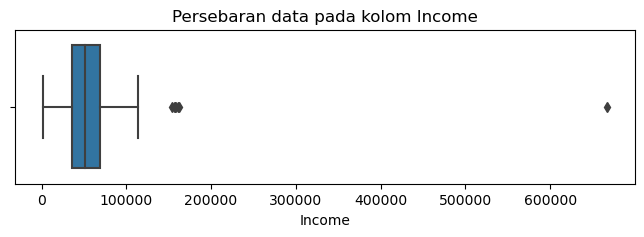

In [16]:
# menampilkan persebaran data pada kolom Income dengan Boxplot
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='Income')
plt.title('Persebaran data pada kolom Income')
plt.show()

<div class="alert alert-block alert-info">
Terdapat outlier pada kolom `Income` sehingga data tidak terdistribusi normal (Right Skewed)
</div>

In [17]:
# cek skewness pada kolom income 
df['Income'].skew()

7.058216394277115

*Missing value* di kolom **Income** memiliki proporsi yang cukup rendah (1,07%). Ada 2 cara untuk menangani *missing value*:

* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan karena walaupun proporsinya sedikit, bisa jadi data tersebut berguna.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. 

Dalam Kasus ini, kita akan mengisi *missing value* dengan *median* karena data pada kolom **Income** tidak terdistribusi normal. Menghapus data akan menjadi opsi terakhir. Namun apabila semua data yang terdapat missing value pada Income diisi dengan nilai median yang sama, maka terjadi frekruensi yang menumpuk di nilai median tersebut. Sehingga saya mencoba melakukan pendekatan dengan mengambil contoh data lain yang memiliki nilai income berdasarkan data Edukasi dan Marital_Status.

In [18]:
# median Income berdasarkan Marital_Status dan Education
df.groupby(['Marital_Status', 'Education'])[['Income']].median()

Income
Marital_Status Education          
Absurd         Graduation 79244.00
               Master     65487.00
Alone          Graduation 34176.00
               Master     61331.00
               PhD        35860.00
Divorced       2n Cycle   54085.00
               Basic      9548.00 
               Graduation 55563.00
               Master     49476.00
               PhD        50616.00
Married        2n Cycle   45994.00
               Basic      22352.00
               Graduation 51277.00
               Master     53204.00
               PhD        57072.00
Single         2n Cycle   48668.50
               Basic      16383.00
               Graduation 49980.00
               Master     49754.00
               PhD        50198.00
Together       2n Cycle   45774.00
               Basic      22634.00
               Graduation 53991.50
               Master     49854.00
               PhD        56567.00
Widow          2n Cycle   47682.00
               Basic      22123.00
               Graduation 58330.00
               Master     51529.00
               PhD        57032.00
YOLO           PhD        48432.00

In [19]:
# mengisi missing value pada kolom Income
df['Income'] = df['Income'].fillna(df.groupby(['Marital_Status', 'Education'])['Income'].transform('median'))

<div class="alert alert-block alert-info">
missing value diisi dengan median karena data pada kolom `Income` tidak terdistribusi normal
</div>

In [20]:
# cek keberadaan missing value
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

<div class="alert alert-block alert-info">
Missing value berhasil diatasi
</div>

### **Perbaikan Kolom**

In [21]:
# perbaikan pada kolom Education
df['Education'] = df['Education'].replace({'Graduation' : 'Undergraduate',
                                           'Basic'      : 'Undergraduate',
                                           '2n Cycle'   : 'Graduate',
                                           'PhD'        : 'Graduate',
                                           'Master'     : 'Graduate'})

In [22]:
df['Education'].value_counts()

Undergraduate    1079
Graduate         979 
Name: Education, dtype: int64

In [23]:
# perbaikan pada kolom Marital Status
df['Marital_Status'] = df['Marital_Status'].replace({'Single'   : 'Single',
                                                    'Divorced'  : 'Single', 
                                                    'Widow'     : 'Single',
                                                    'Alone'     : 'Single',
                                                    'Absurd'    : 'Single',
                                                    'YOLO'      : 'Single',
                                                    'Together'  : 'Partner',
                                                    'Married'   : 'Partner'})

In [24]:
# value telah berhasil diperbaiki
df['Marital_Status'].value_counts()

Partner    1316
Single     742 
Name: Marital_Status, dtype: int64

In [25]:
#Perbaikan nama kolom agar lebih mudah dimengerti
df= df.rename(columns={
    'MntWines'              : 'Wines',
    'MntFruits'             : 'Fruits',
    'MntMeatProducts'       : 'Meat',
    'MntFishProducts'       : 'Fish',
    'MntSweetProducts'      : 'Sweet',
    'MntGoldProds'          : 'Gold',
    'NumDealsPurchases'     : 'Discount_Purchase',
    'NumWebPurchases'       : 'Web_Purchase',
    'NumCatalogPurchases'   : 'Catalog_Purchase',
    'NumStorePurchases'     : 'Store_Purchase',
    'NumWebVisitsMonth'     : 'Web_Visit',
    'Response'              : 'Latest_Cmp'
    })
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Latest_Cmp
0,5524,1957,Undergraduate,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Undergraduate,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Undergraduate,Partner,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Undergraduate,Partner,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Graduate,Partner,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom: Age**

Kita akan mengurangi tahun 2014 dengan tahun lahir pelanggan karena berdasarkan data, 2014 adalah tahun dimana pelanggan terakhir terdaftar.

In [26]:
# Menambahkan kolom Age
df.insert(2, 'Age', df['Year_Birth'].apply(lambda x : 2014 - x))

In [27]:
# cek usia minimal dan maksimal 
print(df['Age'].min())
print(df['Age'].max())

18
121


Rentang usia pelanggan adalah 18-121 Tahun

### **Menambahkan kolom: Age_Group**

Menambahkan kolom baru ini bertujuan untuk mempermudah proses klasifikasi pelanggan berdasarkan rentang umurnya. Rentang Usia akan disederhanakan dengan mengkategorikannya ke dalam beberapa generasi.

- Gen Z: 1997-2012
- Gen Y: 1981-1996
- Gen X: 1965-1980
- Boomers: 1946 - 1964
- Traditionalist: 1928-1945

In [28]:
 # fungsi untuk mengklasifikan usia pelanggan
def age_group(age):
    if age <= 34:
        return '18-34 (Gen Y)'
    elif age >=35 and age <=49:
        return '35-49 (Gen X)'
    elif age >= 50 and age <=69:
        return '50-69 (Boomers)'
    elif age >=70 and age <=87:
        return '70-87 (Traditional)'
    elif age >= 88:
        return '88+ (Greatest Gen)'

In [29]:
# menambahkan kolom Age_group
df.insert(3, 'Age_Group', df['Age'].apply(age_group))

In [30]:
# value telah berhasil diperbaiki
df['Age_Group'].value_counts()

35-49 (Gen X)          946
50-69 (Boomers)        705
18-34 (Gen Y)          389
70-87 (Traditional)    15 
88+ (Greatest Gen)     3  
Name: Age_Group, dtype: int64

In [31]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Latest_Cmp
0,5524,1957,57,50-69 (Boomers),Undergraduate,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,50-69 (Boomers),Undergraduate,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,35-49 (Gen X),Undergraduate,Partner,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,18-34 (Gen Y),Undergraduate,Partner,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,18-34 (Gen Y),Graduate,Partner,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom: N_Adult**

Menambahkan kolom baru ini bertujuan untuk mengetahui jumlah orang dewasa yang ada di rumah. Apabila pelanggan hidup dengan pasangan(**Partner**), maka jumlah nya 2. Apabila mereka lajang (**Single**), maka jumlahnya 1.

In [32]:
# menambahkan kolom N_Adult
df.insert(9, 'N_Adult', df['Marital_Status'].apply(lambda x : 2 if x == 'Partner' else 1))

In [33]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,N_Adult,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Latest_Cmp
0,5524,1957,57,50-69 (Boomers),Undergraduate,Single,58138.00,0,0,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,50-69 (Boomers),Undergraduate,Single,46344.00,1,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,35-49 (Gen X),Undergraduate,Partner,71613.00,0,0,2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,18-34 (Gen Y),Undergraduate,Partner,26646.00,1,0,2,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,18-34 (Gen Y),Graduate,Partner,58293.00,1,0,2,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom: N_Family**

Menambahkan kolom baru ini bertujuan untuk mempermudah proses klasifikasi pelanggan berdasarkan jumlah anggota keluarga dalam satu rumah

In [34]:
# Menambahkan kolom N_Family
df.insert(10, 'N_Family', df['Kidhome'] + df['Teenhome'] + df['N_Adult'])

In [35]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Latest_Cmp
0,5524,1957,57,50-69 (Boomers),Undergraduate,Single,58138.00,0,0,1,1,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,50-69 (Boomers),Undergraduate,Single,46344.00,1,1,1,3,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,35-49 (Gen X),Undergraduate,Partner,71613.00,0,0,2,2,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,18-34 (Gen Y),Undergraduate,Partner,26646.00,1,0,2,3,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,18-34 (Gen Y),Graduate,Partner,58293.00,1,0,2,3,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom: Total_Spent**

Menambahkan kolom baru ini bertujuan untuk mempermudah analisis data konsumen yang paling banyak berbelanja di supermarket

In [36]:
# Menambahkan kolom Total_Spent
df.insert(19, 'Total_Spent', df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold'])

In [37]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Latest_Cmp
0,5524,1957,57,50-69 (Boomers),Undergraduate,Single,58138.00,0,0,1,1,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,50-69 (Boomers),Undergraduate,Single,46344.00,1,1,1,3,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,35-49 (Gen X),Undergraduate,Partner,71613.00,0,0,2,2,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,18-34 (Gen Y),Undergraduate,Partner,26646.00,1,0,2,3,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,18-34 (Gen Y),Graduate,Partner,58293.00,1,0,2,3,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Menambahkan kolom: Income_Class**

Menambahkan kolom baru ini bertujuan untuk mempermudah analisis data konsumen dengan mengklasifikasi konsumen berdasarkan total incomenya pertahun. Apabila income dibawah $52,200 masuk ke kelas Low, $52,200 - $156,600 masuk ke kelas Middle, diatas $156,600 masuk ke kelas Upper [1]

Referensi:
[1] [usnews.com](https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system)

In [38]:
# fungsi untuk mengklasifikasian pelanggan berdasarkan Income
def income(inc):
    if inc <= 52200:
        return 'Low'
    elif inc >=52200 and inc <=156600:
        return 'Middle'
    elif inc >= 156600:
        return 'Upper'

In [39]:
# menambahkan kolom Income_Class
df.insert(7, 'Income_Class', df['Income'].apply(income))

In [40]:
df['Income_Class'].value_counts()

Low       1054
Middle    997 
Upper     7   
Name: Income_Class, dtype: int64

In [41]:
df.sample(10)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Latest_Cmp
250,10236,1975,39,35-49 (Gen X),Graduate,Single,31160.00,Low,1,0,1,2,2013-09-16,59,16,3,25,6,1,13,64,2,2,0,3,8,0,0,0,0,0,0,3,11,0
1456,4042,1971,43,35-49 (Gen X),Undergraduate,Single,43300.00,Low,0,1,1,2,2012-10-13,87,91,3,52,2,1,31,180,3,4,0,4,8,0,0,0,0,0,0,3,11,1
215,1584,1977,37,35-49 (Gen X),Undergraduate,Partner,41443.00,Low,1,0,2,3,2014-04-01,79,171,7,171,25,19,89,482,6,8,1,5,8,0,0,0,0,0,0,3,11,0
1271,7488,1963,51,50-69 (Boomers),Graduate,Single,64191.00,Middle,0,1,1,2,2013-01-22,30,420,15,186,151,38,15,825,3,5,3,13,3,0,0,0,0,0,0,3,11,0
726,6086,1955,59,50-69 (Boomers),Undergraduate,Partner,80395.00,Middle,0,0,2,2,2013-11-23,62,445,25,706,80,76,48,1380,1,6,5,12,2,0,0,0,1,0,0,3,11,0
1364,10507,1977,37,35-49 (Gen X),Graduate,Single,59601.00,Middle,0,1,1,2,2013-07-25,14,691,7,69,0,7,23,797,4,2,2,7,8,0,1,0,0,0,0,3,11,0
859,1031,1989,25,18-34 (Gen Y),Graduate,Partner,85710.00,Middle,0,0,2,2,2013-05-05,5,600,20,350,29,30,33,1062,1,6,9,10,2,0,0,1,0,0,0,3,11,0
2013,1951,1981,33,18-34 (Gen Y),Undergraduate,Partner,34445.00,Low,0,0,2,2,2013-01-27,92,228,122,122,208,129,30,839,6,11,2,8,9,0,0,0,0,0,0,3,11,0
496,8737,1978,36,35-49 (Gen X),Undergraduate,Single,55563.00,Middle,0,1,1,2,2014-04-05,22,29,1,9,2,0,2,43,1,2,0,3,3,0,0,0,0,0,0,3,11,0
2171,3968,1970,44,35-49 (Gen X),Graduate,Single,65706.00,Middle,0,0,1,1,2013-06-28,77,918,10,129,13,0,129,1199,1,11,3,12,7,0,1,1,0,1,0,3,11,1


### **Menambahkan kolom: Accept_Promo**

Menambahkan kolom baru ini bertujuan untuk mengetahui berapa jumlah promosi yang diterima oleh pelanggan

In [42]:
# menambahkan kolom Accept_Promo
df['Accept_Promo'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Latest_Cmp']

In [43]:
df.sample(10)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Latest_Cmp,Accept_Promo
1769,5534,1975,39,35-49 (Gen X),Graduate,Partner,47808.00,Low,0,1,2,3,2013-10-20,30,123,1,26,2,0,72,224,2,3,2,3,7,1,0,0,0,0,0,3,11,0,1
2120,8832,1976,38,35-49 (Gen X),Graduate,Partner,37509.00,Low,1,0,2,3,2012-09-12,24,37,5,56,12,8,5,123,2,3,0,4,7,0,0,0,0,0,0,3,11,0,0
2167,3520,1990,24,18-34 (Gen Y),Graduate,Single,91172.00,Middle,0,0,1,1,2013-03-27,94,162,28,818,0,28,56,1092,0,4,3,7,3,1,0,1,1,1,0,3,11,1,5
138,7660,1973,41,35-49 (Gen X),Graduate,Single,35860.00,Low,1,1,1,3,2014-05-19,37,15,0,8,4,2,20,49,2,1,1,2,5,1,0,0,0,0,0,3,11,1,2
21,5376,1979,35,35-49 (Gen X),Undergraduate,Partner,2447.00,Low,1,0,2,3,2013-01-06,42,1,1,1725,1,1,1,1730,15,0,28,0,1,0,0,0,0,0,0,3,11,0,0
1132,5961,1978,36,35-49 (Gen X),Undergraduate,Partner,42693.00,Low,1,0,2,3,2014-06-07,29,8,4,20,6,3,16,57,1,1,0,3,5,0,0,0,0,0,0,3,11,0,0
2189,1646,1972,42,35-49 (Gen X),Undergraduate,Partner,25224.00,Low,1,0,2,3,2014-03-16,36,4,9,12,11,2,8,46,2,1,1,3,3,0,0,0,0,0,0,3,11,0,0
927,3139,1982,32,18-34 (Gen Y),Graduate,Single,74116.00,Middle,0,0,1,1,2013-12-30,53,871,111,704,145,55,166,2052,1,4,4,10,2,0,1,0,0,0,0,3,11,0,1
2071,2712,1956,58,50-69 (Boomers),Undergraduate,Partner,71866.00,Middle,0,1,2,3,2013-12-25,85,184,178,178,103,39,33,715,1,6,3,10,3,0,0,0,0,0,0,3,11,0,0
1566,7476,1964,50,50-69 (Boomers),Graduate,Single,63972.00,Middle,0,1,1,2,2012-12-02,93,928,63,254,0,12,12,1269,4,5,4,10,4,0,1,0,0,0,0,3,11,0,1


In [44]:
df['Accept_Promo'].value_counts()

0    1489
1    347 
2    133 
3    47  
4    33  
5    9   
Name: Accept_Promo, dtype: int64

### **Menambahkan kolom: Month**

Menambahkan kolom ini bertujuan untuk memudahkan pencarian bulan mana yang memiliki pelanggan baru terbanyak 

In [45]:
# menambahkan kolom Month
df.insert(13, 'Month', df['Dt_Customer'].apply(lambda x : str(x)[:7]))

In [46]:
# mengubah tipe data pada kolom Month dari string menjadi datetime
df['Month'] = pd.to_datetime(df['Month'])

In [47]:
# menampilkan value berupa nama bulan pada kolom Month
df['Month'] = df['Month'].dt.month_name()
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Month,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Latest_Cmp,Accept_Promo
0,5524,1957,57,50-69 (Boomers),Undergraduate,Single,58138.00,Middle,0,0,1,1,2012-09-04,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1
1,2174,1954,60,50-69 (Boomers),Undergraduate,Single,46344.00,Low,1,1,1,3,2014-03-08,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0
2,4141,1965,49,35-49 (Gen X),Undergraduate,Partner,71613.00,Middle,0,0,2,2,2013-08-21,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,30,18-34 (Gen Y),Undergraduate,Partner,26646.00,Low,1,0,2,3,2014-02-10,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,5324,1981,33,18-34 (Gen Y),Graduate,Partner,58293.00,Middle,1,0,2,3,2014-01-19,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0


### **Menghapus kolom: **Z_CostContact** dan **Z_Revenue****

Kolom **Z_CostContact** dan **Z_Revenue** dihapus karena hanya berisikan satu nilai yang sama sehingga datanya tidak bisa digunakan

In [48]:
# menghapus kolom
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'], axis=1)

In [49]:
df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Month,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp,Accept_Promo
0,5524,1957,57,50-69 (Boomers),Undergraduate,Single,58138.00,Middle,0,0,1,1,2012-09-04,September,58,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,1,1
1,2174,1954,60,50-69 (Boomers),Undergraduate,Single,46344.00,Low,1,1,1,3,2014-03-08,March,38,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,0
2,4141,1965,49,35-49 (Gen X),Undergraduate,Partner,71613.00,Middle,0,0,2,2,2013-08-21,August,26,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,30,18-34 (Gen Y),Undergraduate,Partner,26646.00,Low,1,0,2,3,2014-02-10,February,26,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,1981,33,18-34 (Gen Y),Graduate,Partner,58293.00,Middle,1,0,2,3,2014-01-19,January,94,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,0


### **Menangani Outliers**
Terdapat beberapa outliers pada dataset Supermarket Customers terutama pada kolom **Income** dan **Age**. Ada 2 cara menyikapi outlier adalah dengan membiarkan outlier tersebut ada karena bisa jadi berisi informasi yang penting atau dengan menghapus outlier yang tidak relevan dan tidak masuk akal karena bisa menyebabkan data menjadi bias.  

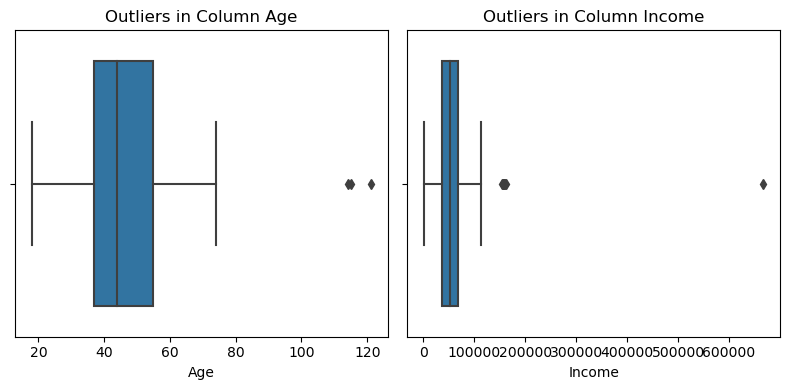

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

sns.boxplot(x=df['Age'], ax=ax1)
ax1.set_title('Outliers in Column Age')

sns.boxplot(x=df['Income'], ax=ax2)
ax2.set_title('Outliers in Column Income')

plt.tight_layout();

#### **Mengatasi Outlier pada kolom: Income** 

Pada tahap sebelumnya, kita telah mengetahui bahwa kolom `Income` tidak terdistribusi normal dan mempunyai outlier. Pada tahap ini kita akan mengecek outlier yang nilainya sangat jauh diatas *upper fence*

In [51]:
# Q1, Q3, IQR Income
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(35701.75, 68242.5, 32540.75)

In [52]:
# Untuk mendeteksi outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)

Lower limit: -13109.375
Upper limit: 117053.625


In [53]:
# mencari nilai lower fence
lower_fence = Q1 - 1.5 * IQR 
lower_fence

-13109.375

In [54]:
# mencari nilai upper fence
upper_fence = Q3 + 1.5 * IQR
upper_fence

117053.625

In [55]:
# outlier pada kolom income
ourlier_income = df[(df['Income'] < lower_fence) | (df['Income'] > upper_fence)]
ourlier_income

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Month,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp,Accept_Promo
164,8475,1973,41,35-49 (Gen X),Graduate,Partner,157243.00,Upper,0,1,2,3,2014-03-01,March,98,20,2,1582,1,2,1,1608,15,0,22,0,0,0,0,0,0,0,0,0,0
617,1503,1976,38,35-49 (Gen X),Graduate,Partner,162397.00,Upper,1,1,2,4,2013-06-03,June,31,85,1,16,2,1,2,107,0,0,0,1,1,0,0,0,0,0,0,0,0
655,5555,1975,39,35-49 (Gen X),Undergraduate,Single,153924.00,Middle,0,0,1,1,2014-02-07,February,81,1,1,1,1,1,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0
687,1501,1982,32,18-34 (Gen Y),Graduate,Partner,160803.00,Upper,0,0,2,2,2012-08-04,August,21,55,16,1622,17,3,4,1717,15,0,28,1,0,0,0,0,0,0,0,0,0
1300,5336,1971,43,35-49 (Gen X),Graduate,Partner,157733.00,Upper,1,0,2,3,2013-06-04,June,37,39,1,9,2,0,8,59,0,1,0,1,1,0,0,0,0,0,0,0,0
1653,4931,1977,37,35-49 (Gen X),Undergraduate,Partner,157146.00,Upper,0,0,2,2,2013-04-29,April,13,1,0,1725,2,1,1,1730,0,0,28,0,1,0,0,0,0,0,0,0,0
2132,11181,1949,65,50-69 (Boomers),Graduate,Partner,156924.00,Upper,0,0,2,2,2013-08-29,August,85,2,1,2,1,1,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0
2233,9432,1977,37,35-49 (Gen X),Undergraduate,Partner,666666.00,Upper,1,0,2,3,2013-06-02,June,23,9,14,18,8,1,12,62,4,3,1,3,6,0,0,0,0,0,0,0,0


Kita bisa melihat bahwa ada satu nilai pada kolom **Income** yang mempunyai nilai yang sangat jauh dari *upper fence* yaitu pelanggan dengan ID 9432 dengan nilai Income sebesar **666666 USD**. Kita bisa mencurigai bahwa pelanggan salah melakukan input data. Selain itu, dengan nilai income yang sangat besar, tetapi jumlah produk yang dibeli tidak lebih besar daripada pelanggan lain. Maka dari itu, data tersebut akan dihilangkan.

In [56]:
# Menghapus data pada index 2233
df.drop([2233], inplace=True)

#### **Mengatasi Outlier pada kolom: Age** 

In [57]:
# Q1 & Q3 Income
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3, IQR


(37.0, 55.0, 18.0)

In [58]:
# Untuk mendeteksi outlier
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('Lower limit:', lower_limit)
print('Upper limit:', upper_limit)


Lower limit: 10.0
Upper limit: 82.0


In [59]:
df[df['Age']>82]

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Month,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp,Accept_Promo
192,7829,1900,114,88+ (Greatest Gen),Graduate,Single,36640.00,Low,1,0,1,2,2013-09-26,September,99,15,6,8,7,4,25,65,1,2,1,2,5,0,0,0,0,0,1,0,0
239,11004,1893,121,88+ (Greatest Gen),Graduate,Single,60182.00,Middle,0,1,1,2,2014-05-17,May,23,8,0,5,7,0,2,22,1,1,0,2,4,0,0,0,0,0,0,0,0
339,1150,1899,115,88+ (Greatest Gen),Graduate,Partner,83532.00,Middle,0,0,2,2,2013-09-26,September,36,755,144,562,104,64,224,1853,1,4,6,4,1,0,0,1,0,0,0,0,1


Terdapat 3 pelanggan yang berumur lebih dari 100 tahun. Hal ini tidak wajar bagi orang berbelanja sendirian diatas 100 tahun. Maka dari itu, data pelanggan akan di drop.

In [60]:
df= df.drop([192, 239, 339], axis=0)

In [61]:
df.describe()

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,N_Adult,N_Family,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp,Accept_Promo
count,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00,2054.00
mean,5597.35,1968.89,45.11,52030.28,0.45,0.51,1.64,2.59,48.96,304.13,26.21,167.74,37.34,27.20,43.83,606.45,2.34,4.10,2.66,5.78,5.32,0.07,0.08,0.07,0.07,0.01,0.01,0.15,0.45
std,3254.93,11.67,11.67,21467.31,0.54,0.55,0.48,0.91,28.99,336.52,39.70,228.28,54.68,41.74,52.01,602.42,1.94,2.80,2.93,3.24,2.44,0.26,0.27,0.26,0.25,0.11,0.10,0.36,0.89
min,0.00,1940.00,18.00,1730.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2811.75,1959.00,37.00,35691.25,0.00,0.00,1.00,2.00,24.00,23.00,1.00,16.00,3.00,1.00,9.00,69.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5511.00,1970.00,44.00,51342.00,0.00,0.00,2.00,3.00,49.00,174.50,8.00,67.00,12.00,8.00,24.00,397.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,8441.25,1977.00,55.00,68146.50,1.00,1.00,2.00,3.00,74.00,504.00,33.00,229.50,50.00,33.75,56.00,1046.50,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,11191.00,1996.00,74.00,162397.00,2.00,2.00,2.00,5.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,2525.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00


In [62]:
df.shape

(2054, 35)

- Data sebelum cleaning terdapat  2240 baris dan 29 kolom
- Data setelah cleaning terdapat 2054 baris dan 35 kolom

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [63]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates()
    sample_size = min(len(unique_values), 2)  # Mengambil sampel sampai 2 atau jumlah yang tersedia
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(unique_values.sample(sample_size).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc


(2054, 35)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2054,"[5015, 5740]"
1,Year_Birth,int64,0,56,"[1983, 1976]"
2,Age,int64,0,56,"[61, 30]"
3,Age_Group,object,0,4,"[18-34 (Gen Y), 70-87 (Traditional)]"
4,Education,object,0,2,"[Undergraduate, Graduate]"
5,Marital_Status,object,0,2,"[Partner, Single]"
6,Income,float64,0,1977,"[43815.0, 77343.0]"
7,Income_Class,object,0,3,"[Low, Upper]"
8,Kidhome,int64,0,3,"[1, 2]"
9,Teenhome,int64,0,3,"[2, 1]"


- Sebelum dibersihkan, kita memiliki 2240 baris data dan 29 kolom, sekarang kita memiliki 2054 baris data dan 35 kolom. Sebanyak 1 baris data yang memuat data tidak relevan dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.
- Dihapus 2 kolom yaitu **Z_CostContact** dan **Z_Revenue** karena memuat data yang sama sehingga tidak dapat menampilkan informasi apapun
- Ditambahkan 8 kolom baru yaitu kolom **Age, Age_Group, N_Adult, N_Family, Income_Class, Total_Spent, Month, dan Accept_Promo** sebagai klasifikasi untuk mempermudah proses analisis

# **4. Data Analysis**
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk **menjawab pernyataan masalah:**.
1. Bagaimana karakteristik pembeli dari setiap kategori produk?
2. Siapa pelanggan yang paling konsumtif?
3. Produk apa yang paling diminati?
4. Channel pemasaran apa yang paling efektif untuk menjangkau target pelanggan untuk produk baru?

## **Analisis Minat Produk**

### **Produk yang paling diminati di JAYA SUPERMARKET**

In [64]:
# total penjualan setiap produk di Supermarket
df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet','Gold']].sum()

Wines     624684
Fruits    53827 
Meat      344543
Fish      76698 
Sweet     55861 
Gold      90028 
dtype: int64

In [65]:
# membuat datafram baru berisikan informasi total penjualan setiap produk
df_produk = pd.DataFrame({
    'Produk' : ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'],
    'Total_Spent' : [624684, 53827, 344543, 76698, 55861, 90028]
}).sort_values('Total_Spent', ascending=False)
df_produk

,Produk,Total_Spent
0,Wines,624684
2,Meat,344543
5,Gold,90028
3,Fish,76698
4,Sweet,55861
1,Fruits,53827


In [66]:
df_produk = df_produk.sort_values('Total_Spent', ascending=False)
df_produk

,Produk,Total_Spent
0,Wines,624684
2,Meat,344543
5,Gold,90028
3,Fish,76698
4,Sweet,55861
1,Fruits,53827


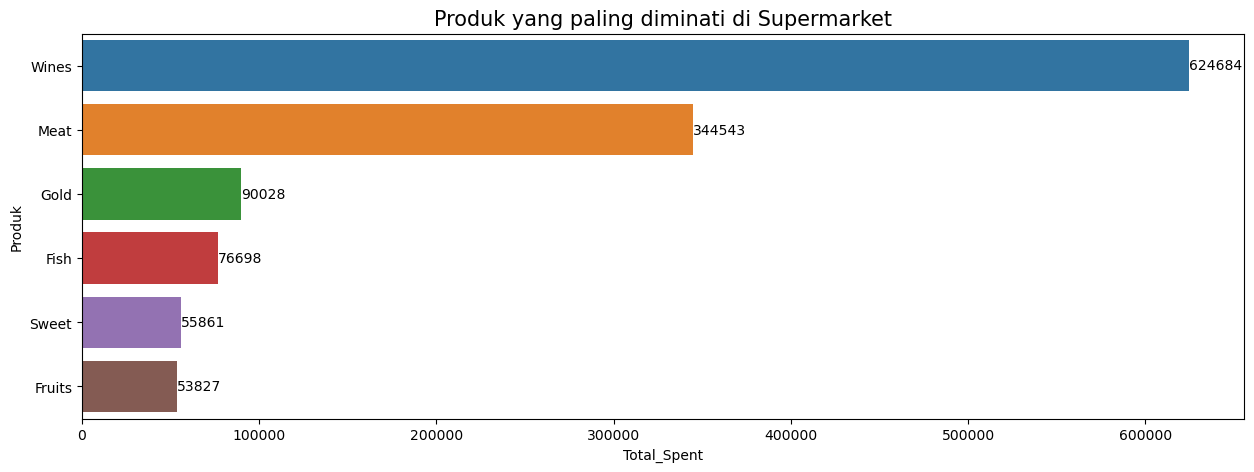

In [67]:
# informasi penjualan setiap produk dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Produk yang paling diminati di Supermarket', size=15)
ax = sns.barplot(df_produk, x='Total_Spent', y='Produk')
for i in ax.containers:
            ax.bar_label(i,)


Dari grafik diatas, kita bisa menarik kesimpulan bahwa:

- Produk yang paling banyak dibeli dalam 2 tahun terakhir :
    - **produk wine** : sebanyak 624684 USD konsumen dikeluarkan untuk membeli wine.
    - **produk meat** : sebanyak 344543 USD uang konsumen dikeluarkan untuk membeli daging.

- Produk buah-buahan adalah produk yang paling sedikit dibeli di Supermarket. Dalam 2 tahun terakhir, sebanyak 53827 dollar uang konsumen dikeluarkan untuk membeli buah-buahan (fruits).

### **10 Pelanggan yang paling konsumtif**

In [68]:
# membuat dataframe baru berisikan data pelanggan dengan total pembelian terbanyak
df_most = df.sort_values('Total_Spent', ascending=False).head(10)
df_most.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Month,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp,Accept_Promo
1179,5735,1991,23,18-34 (Gen Y),Graduate,Single,90638.00,Middle,0,0,1,1,2014-02-13,February,29,1156,120,915,94,144,96,2525,1,3,4,10,1,0,0,1,0,0,0,0,1
1572,5350,1991,23,18-34 (Gen Y),Graduate,Single,90638.00,Middle,0,0,1,1,2014-02-13,February,29,1156,120,915,94,144,96,2525,1,3,4,10,1,0,0,1,0,0,0,1,2
1492,1763,1988,26,18-34 (Gen Y),Undergraduate,Partner,87679.00,Middle,0,0,2,2,2013-07-27,July,62,1259,172,815,97,148,33,2524,1,7,11,10,4,1,0,1,1,0,0,1,4
987,4580,1969,45,35-49 (Gen X),Undergraduate,Partner,75759.00,Middle,0,0,2,2,2013-10-25,October,46,1394,22,708,89,91,182,2486,1,9,7,9,5,1,0,1,1,0,0,1,4
1052,4475,1949,65,50-69 (Boomers),Graduate,Partner,69098.00,Middle,0,0,2,2,2013-02-16,February,82,1315,22,780,145,0,178,2440,1,7,8,9,5,0,0,0,0,0,0,0,0


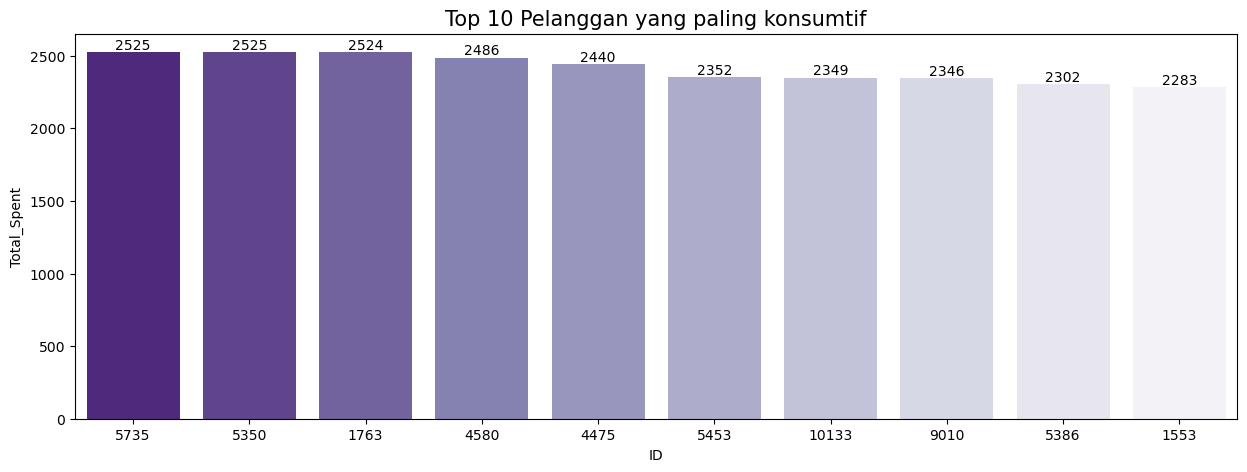

In [69]:
# informasi pelanggan dengan total pembelian produk terbanyak dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Top 10 Pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_most, x='ID', y='Total_Spent', palette = 'Purples_r', order=df_most.sort_values('Total_Spent', ascending=False).ID)
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita dapat menarik kesimpulan bahwa pelanggan yang paling banyak membeli produk di JAYA SUPERMARKET adalah pelanggan dengan ID 5735 dan 5350 dengan total pembelian sebesar 2525 dollar sehingga 10 konsumen ini bisa diberikan reward khusus sebagai apresiasi karena telah menjadi *loyal customer* Supermarket.

### **Cek distribusi data pada kolom kategori Produk**

Cek distribusi data ini bertujuan untuk melihat sebaran data pada beberapa kolom yang akan dianalisis

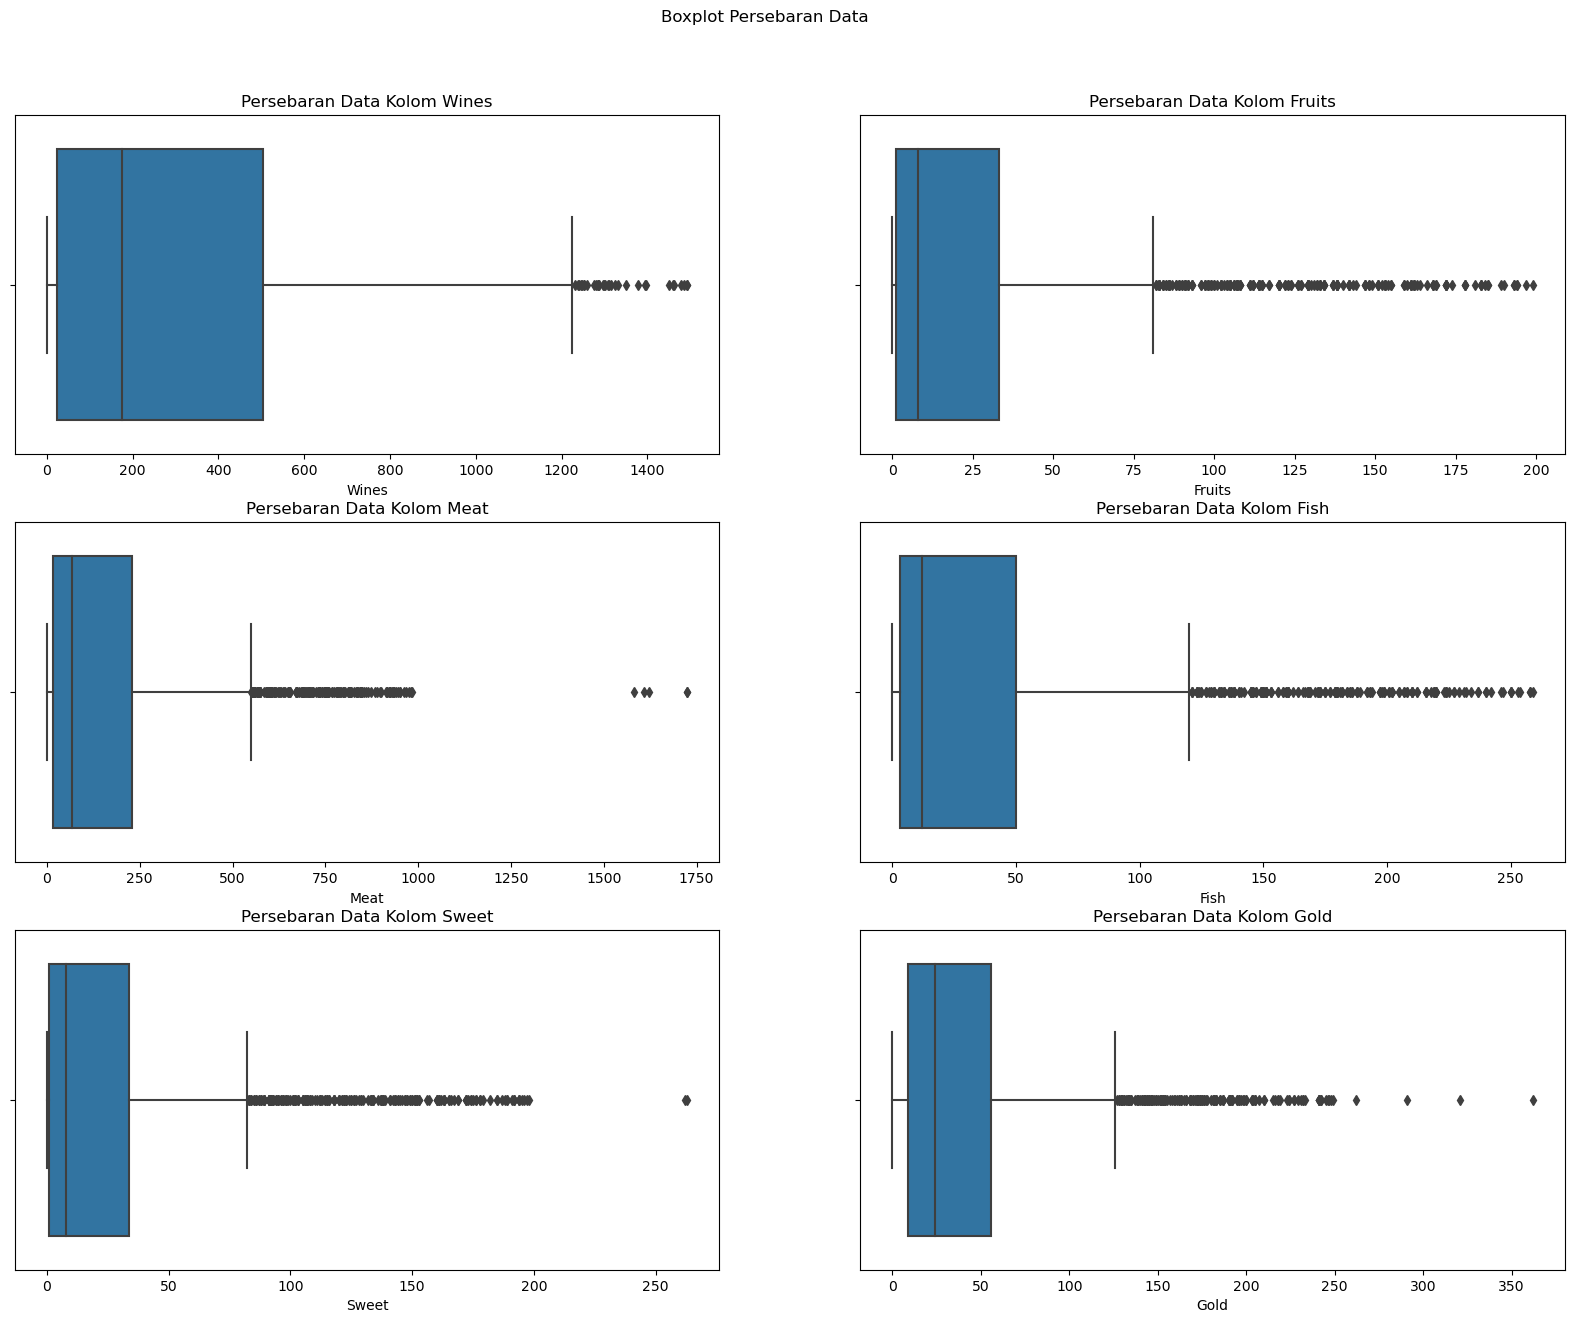

In [70]:
# Melihat persebaran data kategori produk menggunakan boxplot
list_corr = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
id = 0
n_rows = 3
n_cols = 2
plt.figure(figsize=(20,15))

for i in range(n_rows) :
    for j in range(n_cols) :
        plt.subplot(n_rows, n_cols, id + 1)
        sns.boxplot(data=df, x = list_corr[id])
        plt.title(f'Persebaran Data Kolom {list_corr[id]}', y=1)
        id += 1

plt.suptitle("Boxplot Persebaran Data", y=0.95)
plt.show()

In [71]:
# Uji normalitas setiap kolom kategori produk dengan normaltest 
list_produk = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
for i in list_produk:
    stat, pvalue = normaltest(df[i])
    if pvalue > 0.05 :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} terdistribusi normal')
    else :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data pada kolom Wines TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Fruits TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Meat TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Fish TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Sweet TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Gold TIDAK terdistribusi normal


Dapat dilihat semua kolom diatas tidak terdistribusi normal, maka kita akan menggunakan **median** untuk tahap analisis selanjutnya

### **Minat Produk berdasarkan `Age_Group`**

#### **Rentang usia pelanggan yang paling konsumtif**

In [72]:
# membuat variabel baru berisi data total pembelian berdasarkan rentang usia
df_total_spent_age = df.groupby('Age_Group')[['Total_Spent']].median().reset_index()
df_total_spent_age.sort_values('Total_Spent', ascending=False)

,Age_Group,Total_Spent
3,70-87 (Traditional),1060.00
2,50-69 (Boomers),599.00
1,35-49 (Gen X),294.00
0,18-34 (Gen Y),172.00


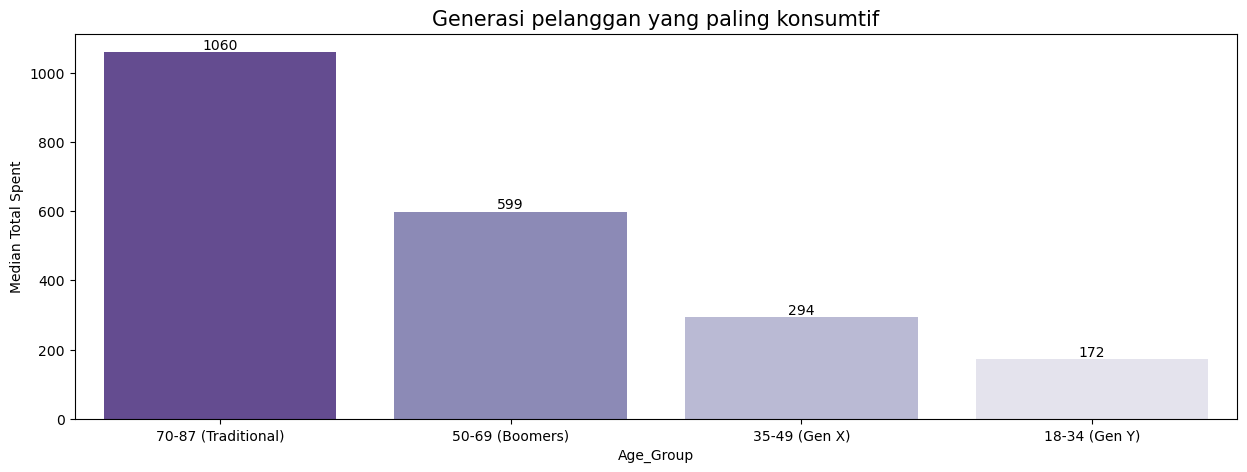

In [73]:
# informasi pelanggan dengan rentang usia paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Generasi pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_age, x='Age_Group', y='Total_Spent', palette='Purples_r', order=df_total_spent_age.sort_values('Total_Spent', ascending=False).Age_Group)
plt.ylabel('Median Total Spent')
for i in ax.containers:
            ax.bar_label(i,)

Dari grafik di atas, kita bisa mengambil kesimpulan bahwa:

- Gen Traditional menjadi yang paling konsumtif disusul dengan Gen Boomers.
- Gen Y menjadi yang paling tidak konsumtif.
- Semakin tua umurnya, semakin konsumtif.

### **Minat beli produk berdasarkan rentang usia**

In [74]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan rentang usia
df_product_per_age_group = df.groupby('Age_Group')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].median().reset_index()
df_product_per_age_group

,Age_Group,Wines,Fruits,Meat,Fish,Sweet,Gold
0,18-34 (Gen Y),53.00,8.00,48.00,13.00,10.00,20.00
1,35-49 (Gen X),141.00,6.00,53.00,10.00,7.00,21.00
2,50-69 (Boomers),292.00,12.00,97.00,16.00,11.00,30.00
3,70-87 (Traditional),532.00,33.00,218.00,55.00,14.00,22.00


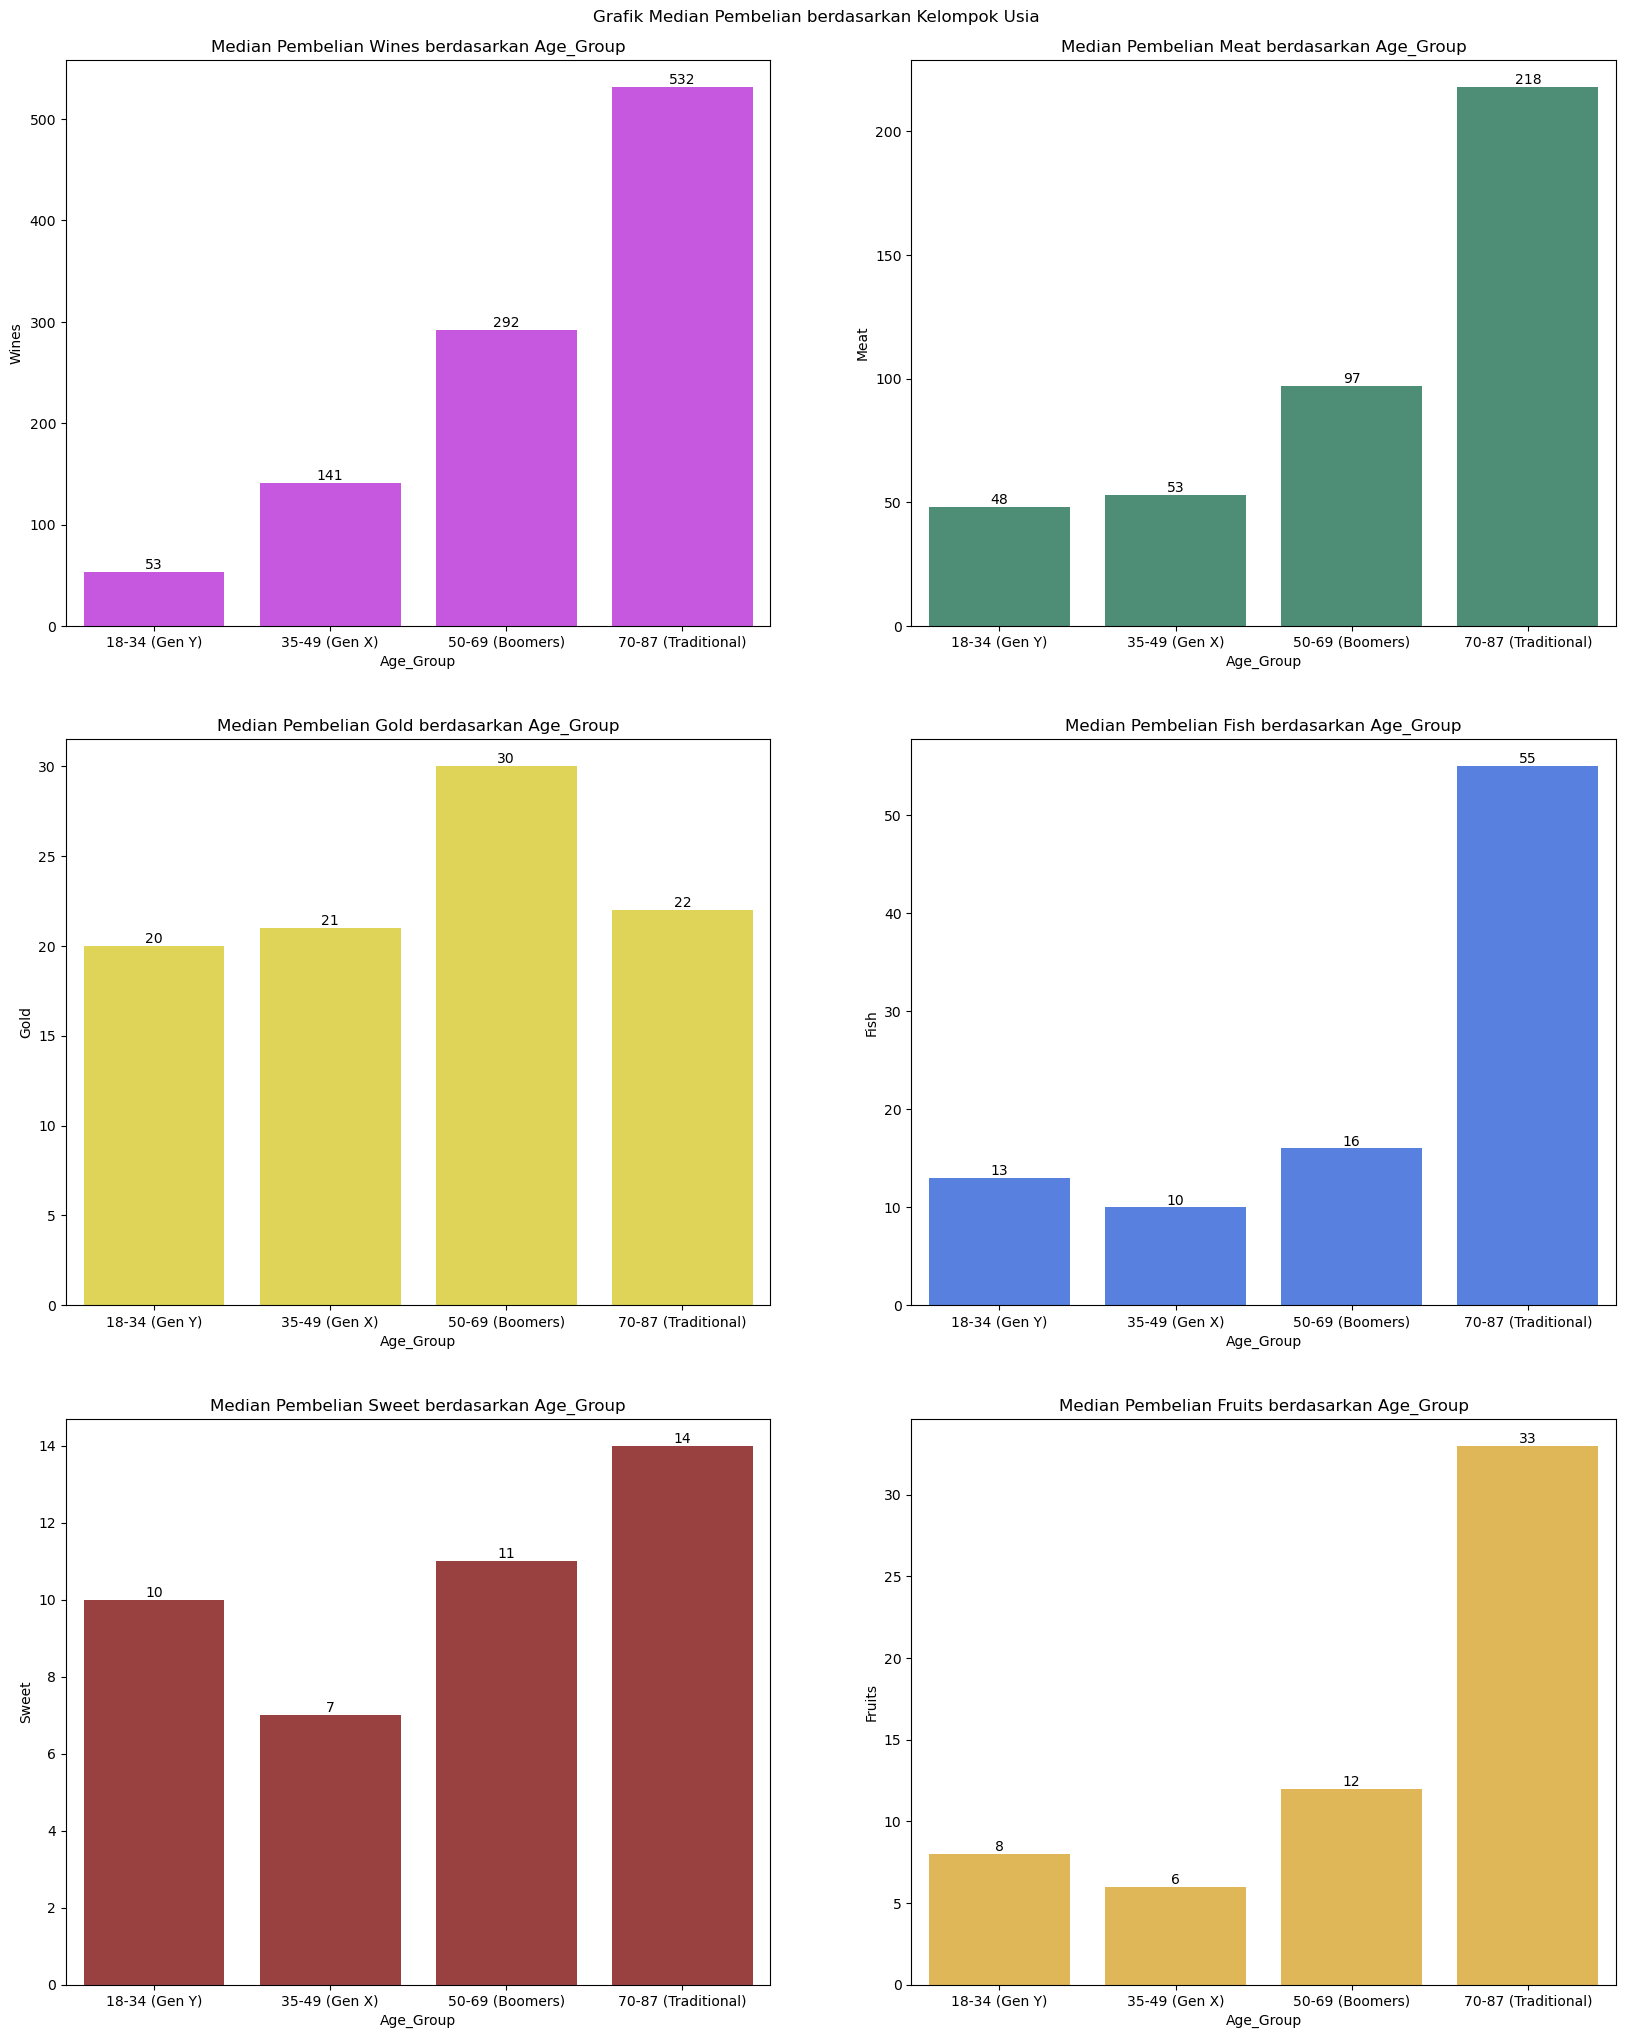

In [75]:
list_product = ['Wines', 'Meat', 'Gold', 'Fish', 'Sweet', 'Fruits']
colors = ['#d442f5', '#449878', '#f5e642', '#4277f5', '#a83232', '#f5bf42']


plt.figure(figsize=(20, 25))

id = 0
n_rows = 3
n_cols = 2

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(
            data=df_product_per_age_group,
            x='Age_Group', 
            y=list_product[id],
            ci=0,
            estimator=np.median,
            palette=[colors[id]]
        )
        plt.xticks(rotation=0)
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan Age_Group')
        id += 1
        for container in ax.containers:
            ax.bar_label(container)

plt.suptitle("Grafik Median Pembelian berdasarkan Kelompok Usia", y=0.9)
plt.show()

> ### **Insight** :

- Generasi Traditional menjadi pembeli utama dari setiap kategori produk, kecuali produk Gold

- Wines: Produk wine paling banyak dibeli oleh pelanggan generasi Traditionalist, diikuti generasi Boomers.

- Meat: paling banyak dibeli oleh pelanggan generasi Traditionalist.

- Gold : paling banyak dibeli oleh pelanggan yang generasi Boomers dan paling sedikit dibeli oleh pelanggan Gen X dan Gen Y.

- Fish: paling banyak dibeli oleh pelanggan generasi Traditionalist.

- Sweet: paling banyak dibeli oleh pelanggan generasi Y dan paling sedikit dibeli oleh pelanggan generasi Traditionalist dengan perbedaan median dimana pelanggan traditionalist sama sekali tidak membeli produk manis.

- Fruits: Buah-buahan paling banyak dibeli oleh pelanggan generasi Traditionalist dan paling sedikit dibeli oleh generasi muda, yaitu Gen X dan Gen Y.


<div class="alert alert-block alert-info">
Terlihat beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda. Kita akan mencoba uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.
</div>

Hipotesis :

- Ho : Median semua Generasi terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [76]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet','Gold']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Age_Group'] == '18-34 (Gen Y)'][i],
        df[df['Age_Group'] == '35-49 (Gen X)'][i],
        df[df['Age_Group'] == '50-69 (Boomers)'][i],
        df[df['Age_Group'] == '70-87 (Traditional)'][i]
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua generasi terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua generasi terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua generasi terhadap minat pembelian produk Wines berbeda signifikan
    

    pvalue = 0.00033. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua generasi terhadap minat pembelian produk Fruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua generasi terhadap minat pembelian produk Meat berbeda signifikan
    

    pvalue = 0.00009. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua generasi terhadap minat pembelian produk Fish berbeda signifikan
    

    pvalue = 0.00653. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua generasi terhadap minat pembelian produk Sweet berbeda signifikan
    

    pvalue = 0.00032. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua generasi terhadap minat pembelian produk Gold berbeda signifikan
    


### **Minat Produk berdasarkan `Marital_Status`**

#### **Status pernikahan pelanggan yang paling konsumtif**

In [77]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan status pernikahan
df_total_spent_status = df.groupby('Marital_Status')[['Total_Spent']].median().reset_index()
df_total_spent_status.sort_values('Total_Spent', ascending=False)

,Marital_Status,Total_Spent
0,Partner,397.00
1,Single,397.00


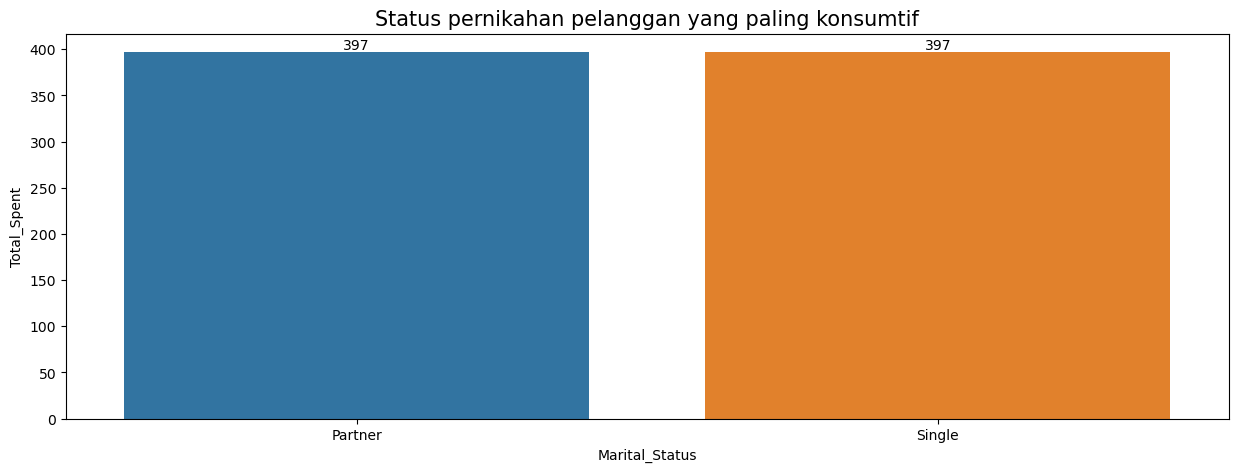

In [78]:
# informasi pelanggan dengan status pernikahan paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Status pernikahan pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_status, x='Marital_Status', y='Total_Spent', order=df_total_spent_status.sort_values('Total_Spent', ascending=False).Marital_Status)
for i in ax.containers:
    ax.bar_label(i,)

> ### **Insight** :

- Baik Single maupun Partner sama-sama konsumtif dengan total pengeluaran median 397 USD

### **Minat beli produk berdasarkan status pernikahan**

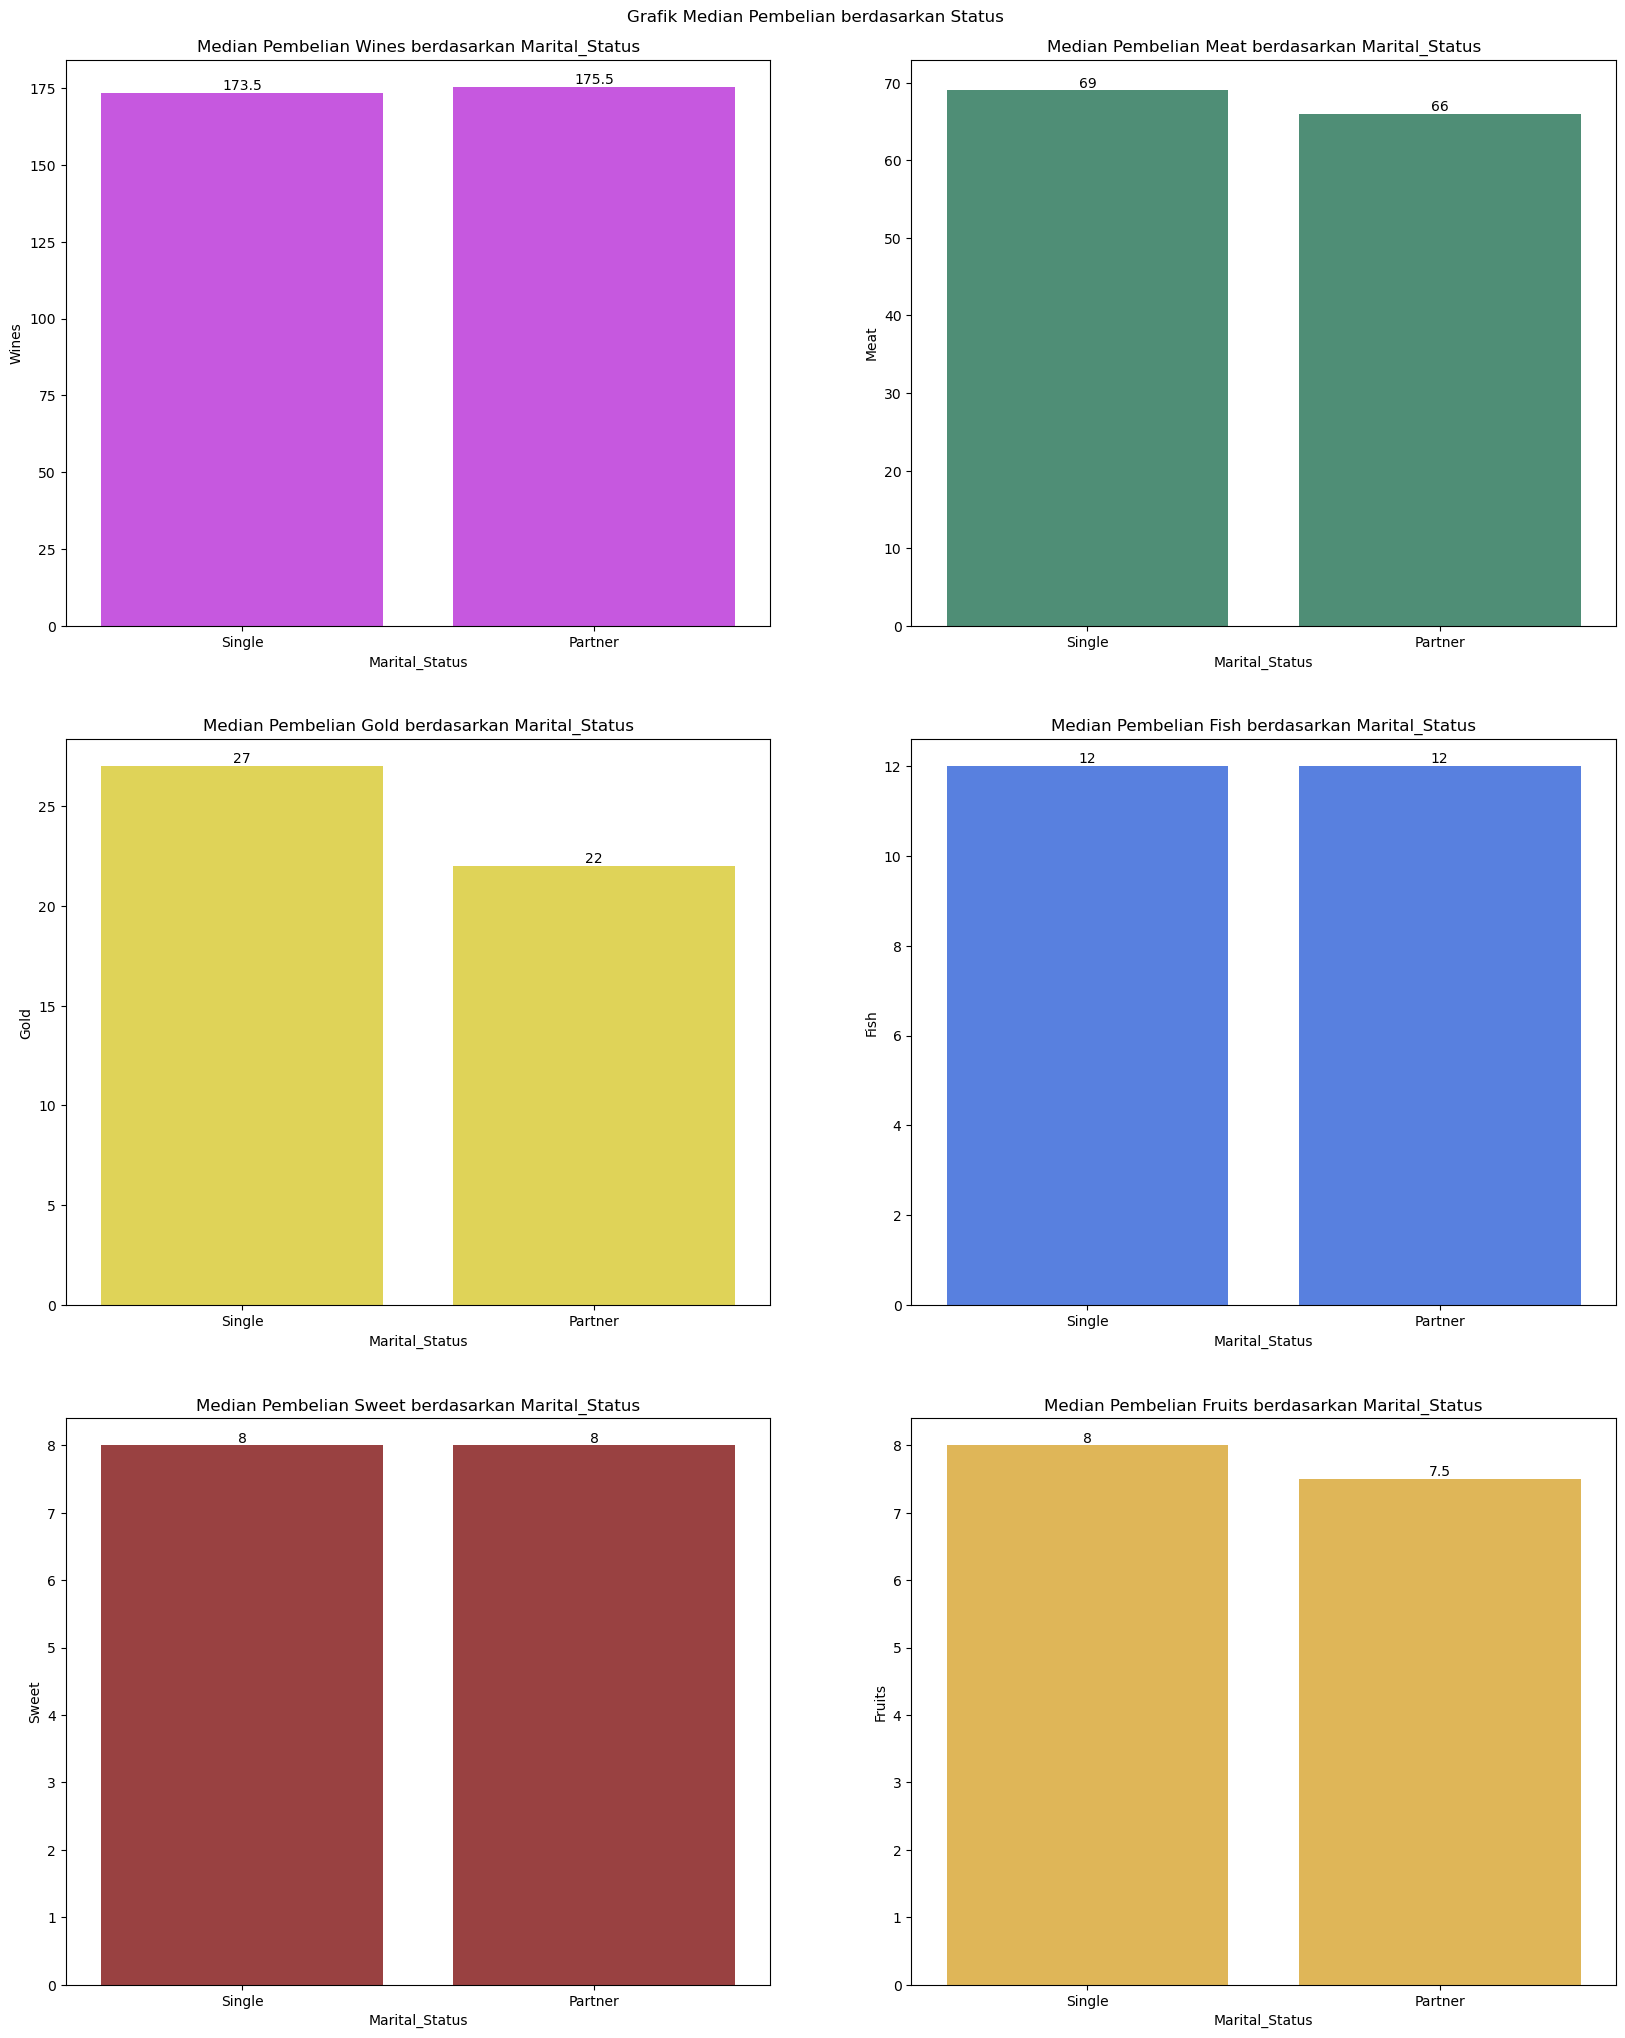

In [79]:
plt.figure(figsize=(20, 25))

id = 0
n_rows = 3
n_cols = 2

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(
            data=df,
            x='Marital_Status', 
            y=list_product[id],
            ci=0,
            estimator=np.median,
            palette=[colors[id]]
        )
        plt.xticks(rotation=0)
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan Marital_Status')
        id += 1
        for container in ax.containers:
            ax.bar_label(container)

plt.suptitle("Grafik Median Pembelian berdasarkan Status", y=0.9)
plt.show()

> ### **Insight** :

- Wines : Tidak ada perbedaan signifikan dalam pembelian wine baik single maupun partner.

- Meat : Pembelian produk daging paling banyak dibeli oleh pelanggan yang berstatus single dibandingkan partner

- Gold : Pembelian produk emas paling banyak dibeli oleh pelanggan yang berstatus single dibandingkan partner

- Fish : Tidak ada perbedaan signifikan dalam pembelian produk ikan baik single maupun partner.

- Sweet : Tidak ada perbedaan signifikan dalam pembelian produk manis baik single maupun partner.

- Fruits : Pelanggan berstatus single lebih banyak membeli produk buah dibandingkan status partner

<div class="alert alert-block alert-info">
Terlihat grafik mempunyai median tidak berbeda. Kita akan mencoba uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.
</div>

Hipotesis :

- Ho : Median semua status terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [80]:
# uji hipotesis menggunakan kruskal wallis
list_produk = ['Wines', 'Fruits', 'Meat','Fish','Sweet','Gold']
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Marital_Status'] == 'Single'][i],
        df[df['Marital_Status'] == 'Partner'][i]
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua status pernikahan terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.81339. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk Wines TIDAK berbeda signifikan       
    

    pvalue = 0.11042. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk Fruits TIDAK berbeda signifikan       
    

    pvalue = 0.55704. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk Meat TIDAK berbeda signifikan       
    

    pvalue = 0.50495. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk Fish TIDAK berbeda signifikan       
    

    pvalue = 0.63156. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk Sweet TIDAK berbeda signifikan       
    

    pvalue = 0.05124. pvalue > 0.05. Gagal Menolak Ho.
    Median semua status pernikahan terhadap minat pembelian produk Gold TIDAK berbeda signifikan       
    


### **Minat Produk berdasarkan `Education`**
#### **Tingkat pendidikan pelanggan yang paling konsumtif**

In [81]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan tingkat pendidikan
df_total_spent_edu = df.groupby('Education')[['Total_Spent']].median().reset_index()
df_total_spent_edu.sort_values('Total_Spent', ascending=False)

,Education,Total_Spent
0,Graduate,410.50
1,Undergraduate,368.50


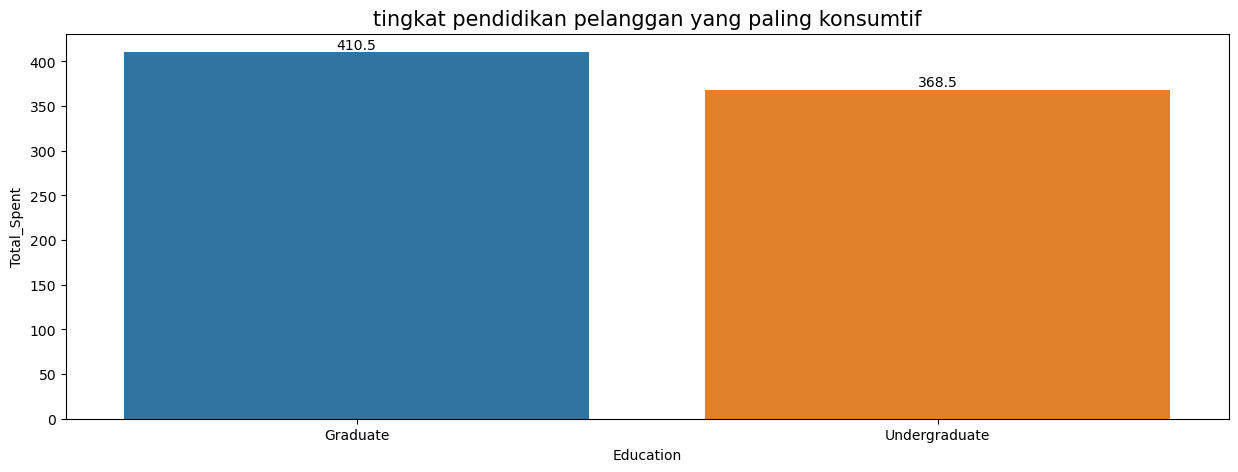

In [82]:
# informasi pelanggan dengan tingkat pendidikan paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('tingkat pendidikan pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_edu, x='Education', y='Total_Spent', order=df_total_spent_edu.sort_values('Total_Spent', ascending=False).Education)
for i in ax.containers:
            ax.bar_label(i,)

> ### **Insight** :
- Tingkat pendidikan Graduate menjadi yang paling konsumtif dibandingkan undergraduate, tetapi selisih perbedaannya tidak terlalu jauh.

### **Minat beli produk berdasarkan pendidikan terakhir**

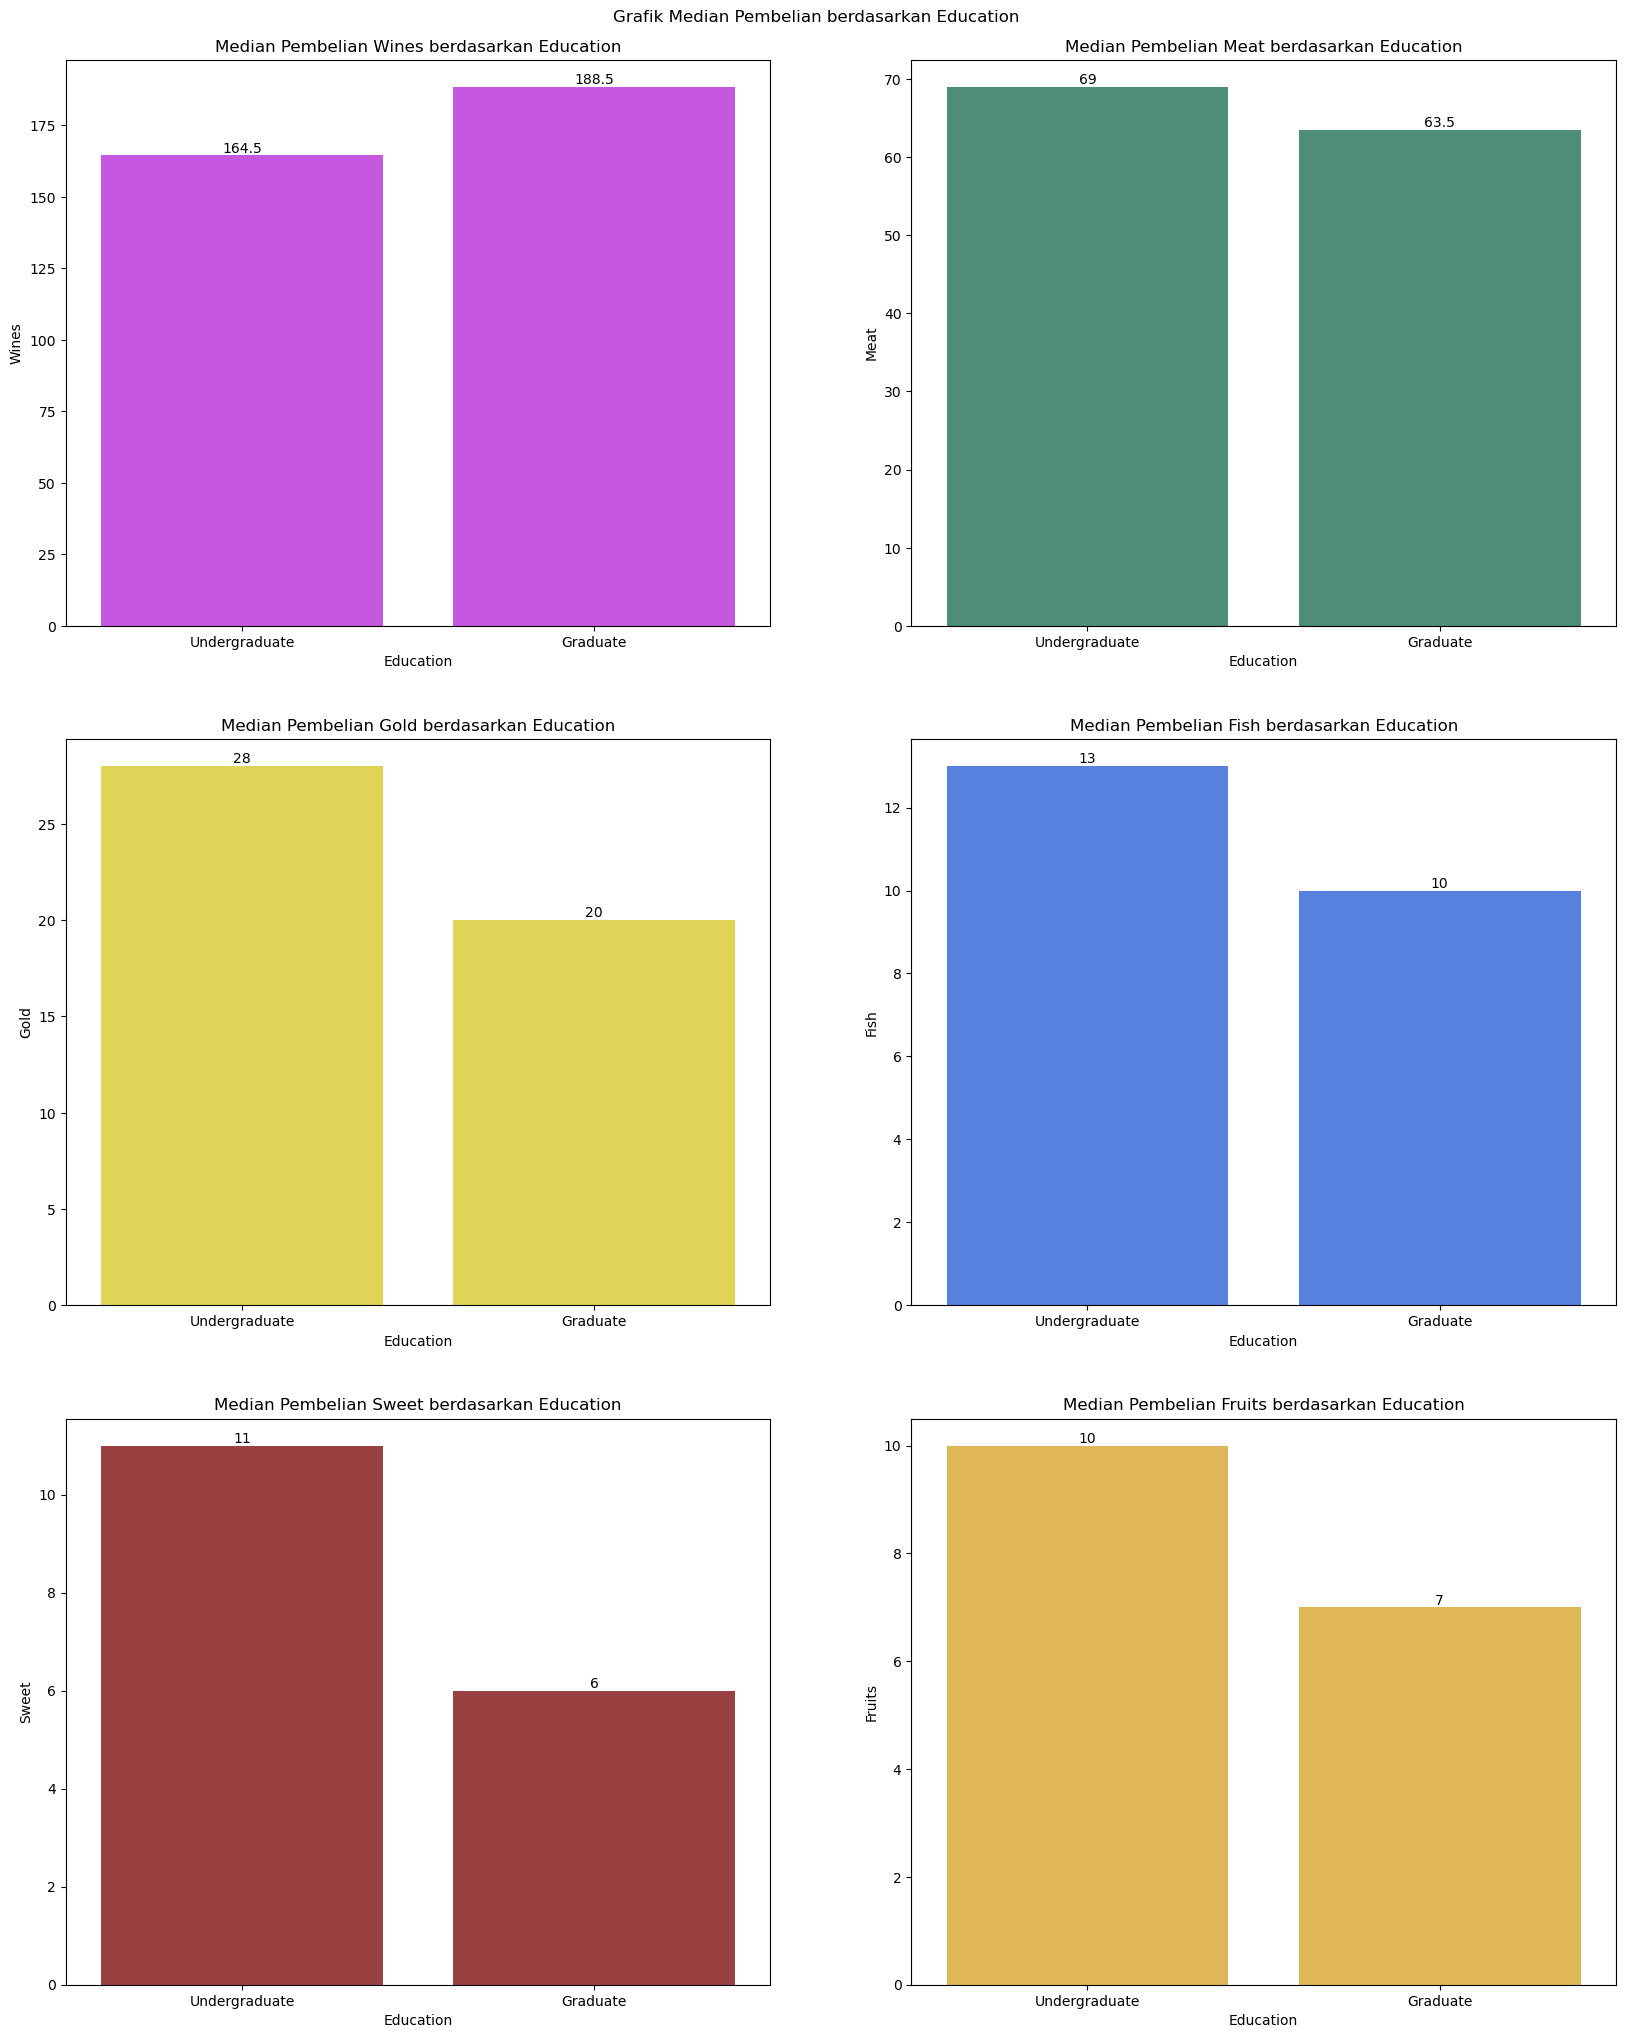

In [83]:
list_product
colors


plt.figure(figsize=(20, 25))

id = 0
n_rows = 3
n_cols = 2

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(
            data=df,
            x='Education', 
            y=list_product[id],
            ci=0,
            estimator=np.median,
            palette=[colors[id]]
        )
        plt.xticks(rotation=0)
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan Education')
        id += 1
        for container in ax.containers:
            ax.bar_label(container)

plt.suptitle("Grafik Median Pembelian berdasarkan Education", y=0.9)
plt.show()

> ### **Insight** :

- Wines : Pembelian produk Wine paling banyak dibeli oleh pelanggan dengan level Graduate dibandingkan Undergraduate

- Meat : Pembelian produk daging paling banyak dibeli oleh pelanggan dengan level Undergraduate dibandingkan Graduate

- Gold : Pembelian produk emas paling banyak dibeli oleh pelanggan dengan level Undergraduate dibandingkan Graduate

- Fish : Pembelian produk ikan paling banyak dibeli oleh pelanggan dengan level Undergraduate dibandingkan Graduate

- Sweet : Pembelian produk manis paling banyak dibeli oleh pelanggan dengan level Undergraduate dibandingkan Graduate

- Fruits : Pembelian produk buah paling banyak dibeli oleh pelanggan dengan level Undergraduate dibandingkan Graduate

<div class="alert alert-block alert-info">
Terlihat beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda. Kita akan mencoba uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.
</div>

Hipotesis :

- Ho : Median semua jenjang akhir pendidikan terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [84]:
# uji hipotesis menggunakan kruskal wallis
list_produk
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Education'] == 'Undergraduate'][i],
        df[df['Education'] == 'Graduate'][i]
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk Wines berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk Fruits berbeda signifikan
    

    pvalue = 0.51111. pvalue > 0.05. Gagal Menolak Ho.
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk Meat TIDAK berbeda signifikan       
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk Fish berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk Sweet berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median semua jenjang akhir pendidikan terhadap minat pembelian produk Gol

### **Minat Produk berdasarkan `Income_Class`**

#### **Income Class pelanggan yang paling konsumtif**

In [85]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan Income Class
df_total_spent_income = df.groupby('Income_Class')[['Total_Spent']].median().reset_index()
df_total_spent_income.sort_values('Total_Spent', ascending=False)

,Income_Class,Total_Spent
1,Middle,1045.00
2,Upper,857.50
0,Low,73.00


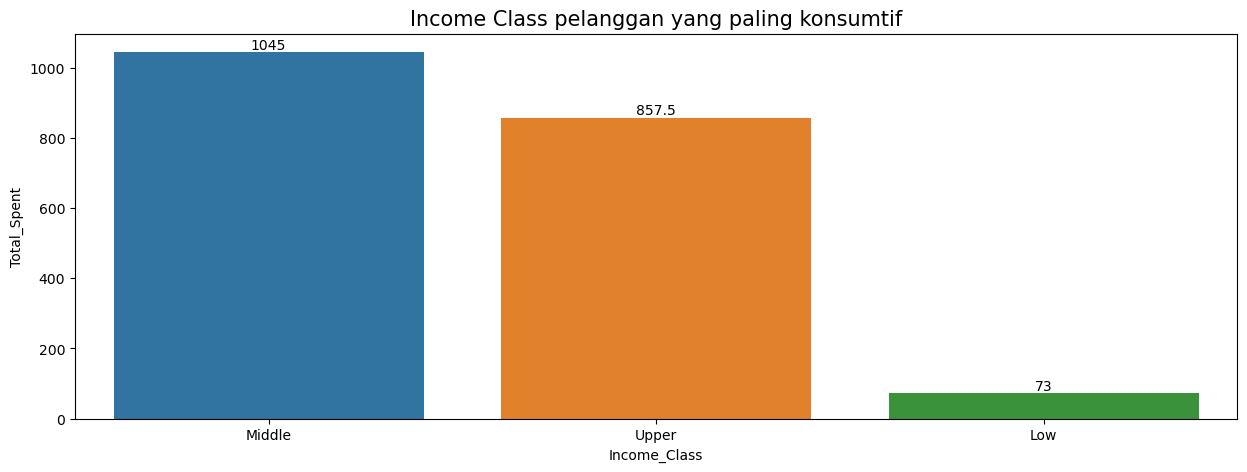

In [86]:
# informasi pelanggan dengan Income Class paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Income Class pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_income, x='Income_Class', y='Total_Spent', order=df_total_spent_income.sort_values('Total_Spent', ascending=False).Income_Class)
for i in ax.containers:
            ax.bar_label(i,)

> ### **Insight** :
- Income Class Middle menjadi yang paling konsumtif disusul dengan Income Class Upper.
- Income Class Low menjadi yang paling tidak konsumtif.

### **Minat beli produk berdasarkan Income Class**

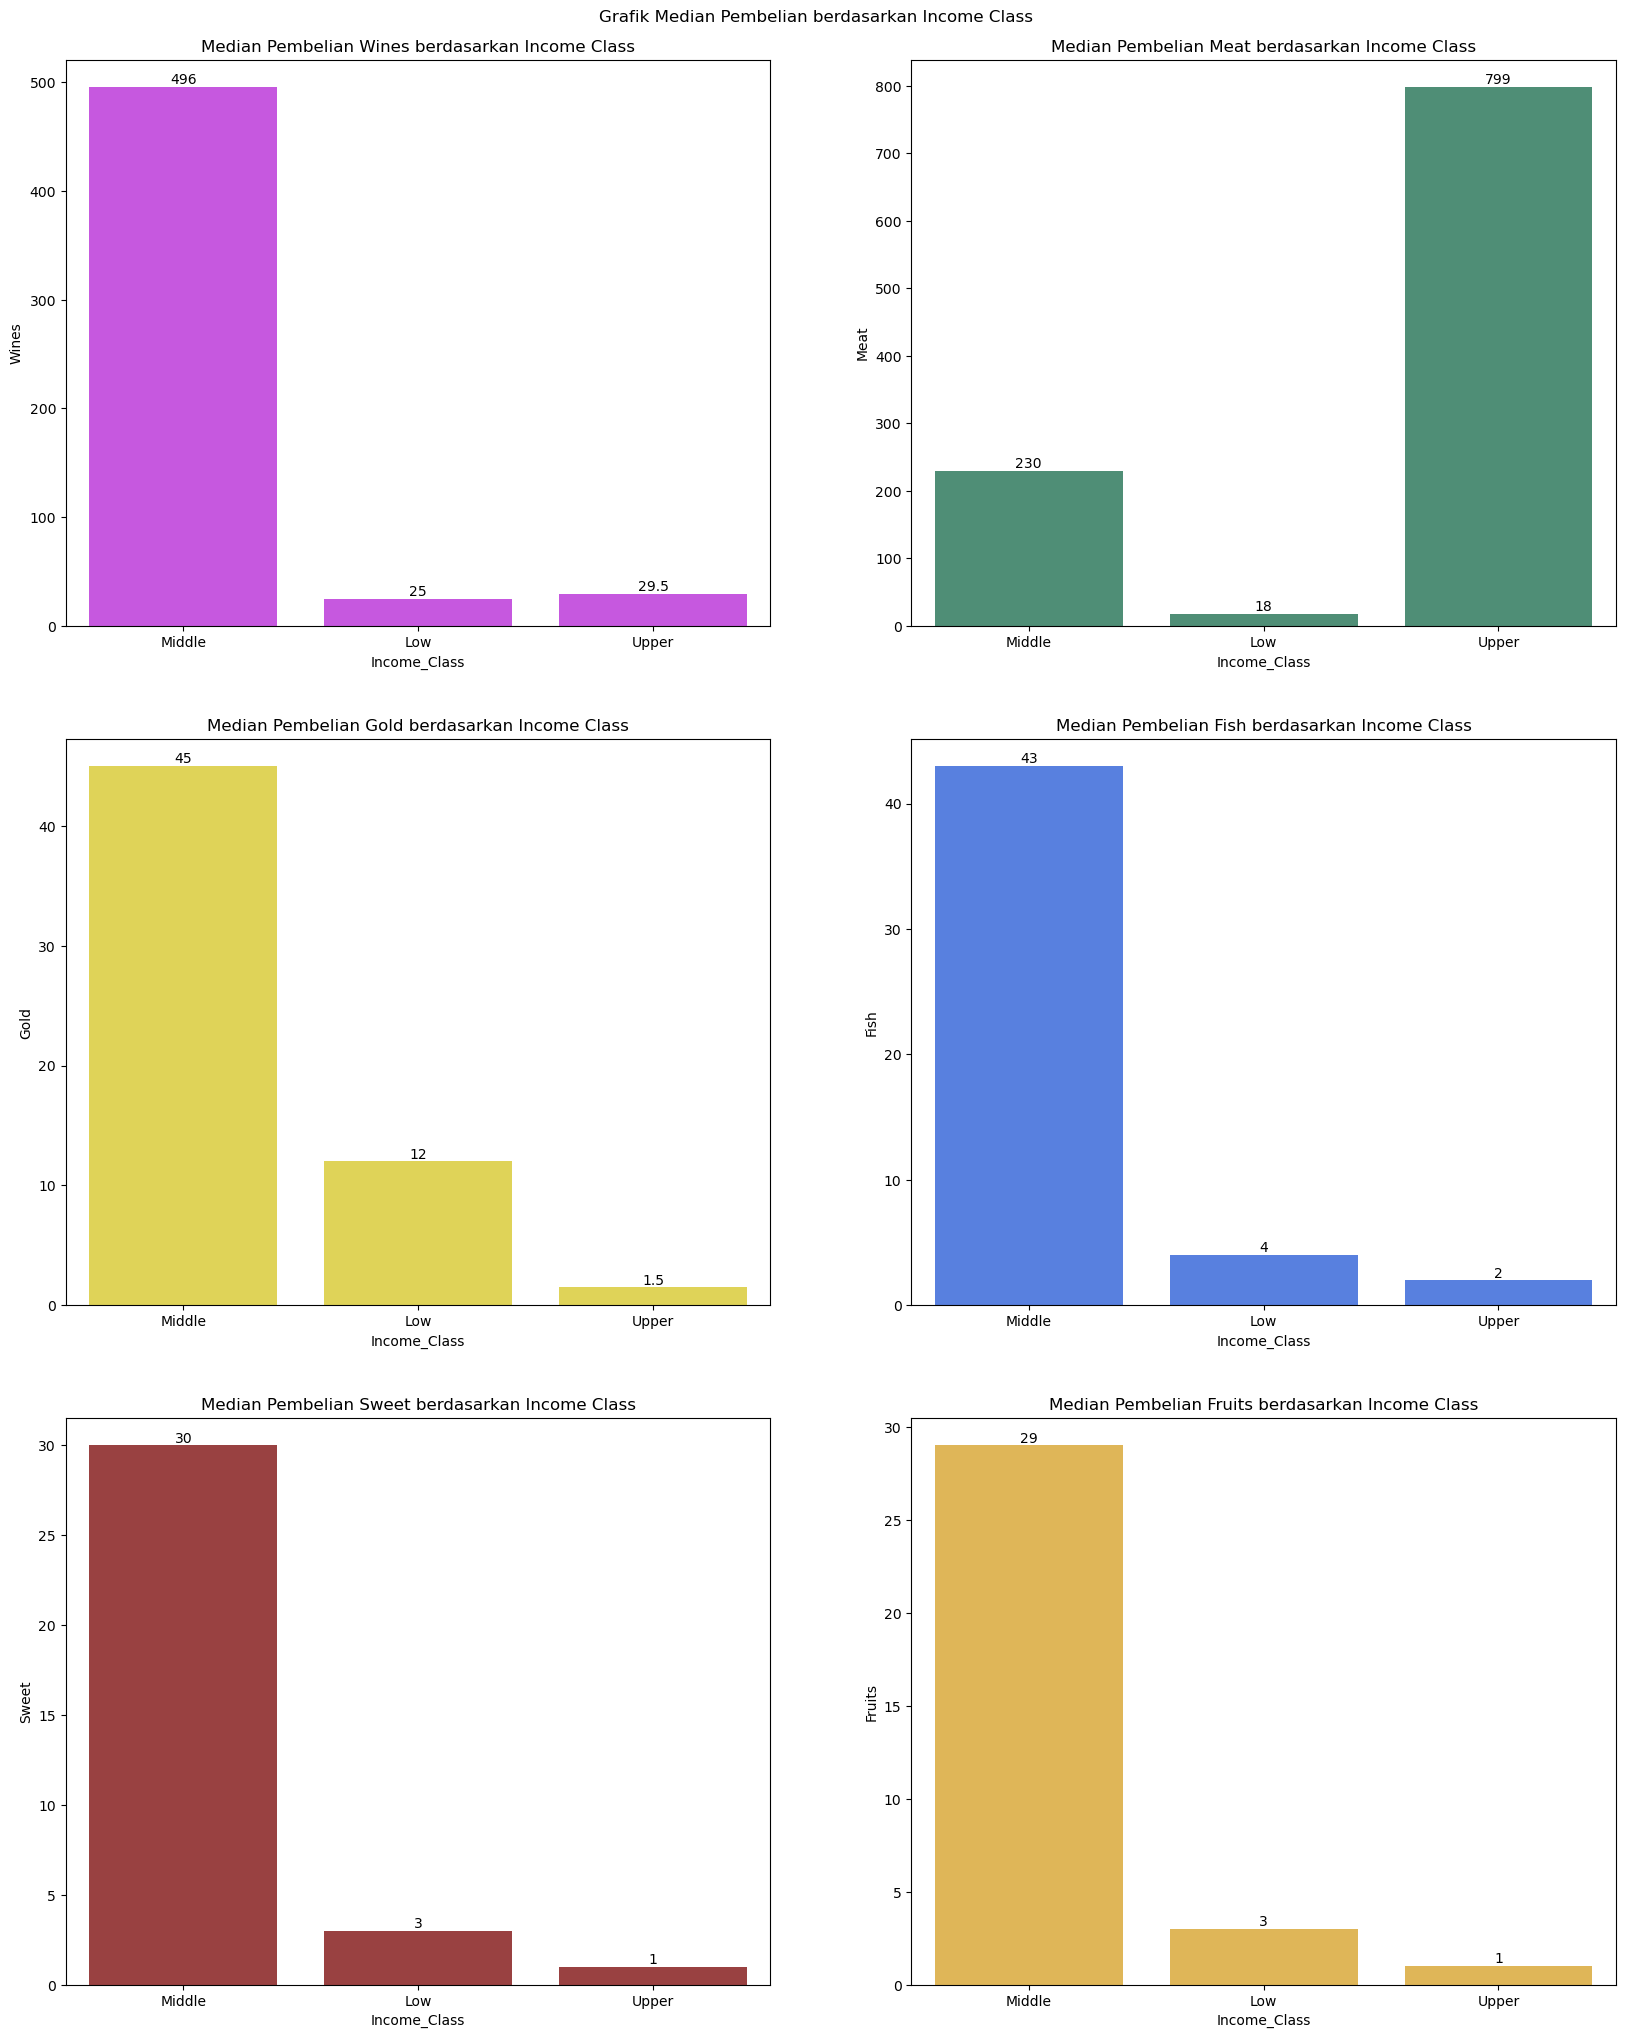

In [87]:
plt.figure(figsize=(20, 25))

id = 0
n_rows = 3
n_cols = 2

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(
            data=df,
            x='Income_Class', 
            y=list_product[id],
            ci=0,
            estimator=np.median,
            palette=[colors[id]]
        )
        plt.xticks(rotation=0)
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan Income Class')
        id += 1
        for container in ax.containers:
            ax.bar_label(container)

plt.suptitle("Grafik Median Pembelian berdasarkan Income Class", y=0.9)
plt.show()

> ### **Insight** :

- Wines : Pembelian produk wine paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class low

- Meat : Pembelian produk daging paling banyak dibeli oleh pelanggan dengan Income_Class Upper dan paling sedikit dibeli oleh pelanggan dengan Income_Class Low 

- Gold : Pembelian produk emas paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class Upper

- Fish : Pembelian produk ikan paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class Upper

- Sweet : paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class Upper

- Fruits : Pembelian produk buah paling banyak dibeli oleh pelanggan dengan Income_Class Middle dan paling sedikit dibeli oleh pelanggan dengan Income_Class Upper

### **Minat Produk berdasarkan `Income`**
Secara singkat, kita bisa mengetahui bahwa semua kolom diatas tidak terdistribusi normal, sehingga untuk menemukan korelasinya, kita akan menggunakan *spearman* sebagai method

In [88]:
# membuat variable baru yang berisi korelasi setiap kolom produk dengan income dan total pembelian
df_corr = df[['Total_Spent', 
              'Wines', 
              'Fruits', 
              'Meat',
              'Fish',
              'Sweet',
              'Gold', 
              'Income']].corr('spearman')
df_corr

,Total_Spent,Wines,Fruits,Meat,Fish,Sweet,Gold,Income
Total_Spent,1.00,0.93,0.68,0.94,0.69,0.67,0.69,0.85
Wines,0.93,1.00,0.51,0.82,0.52,0.50,0.57,0.83
Fruits,0.68,0.51,1.00,0.71,0.71,0.69,0.57,0.57
Meat,0.94,0.82,0.71,1.00,0.73,0.70,0.64,0.81
Fish,0.69,0.52,0.71,0.73,1.00,0.70,0.56,0.57
Sweet,0.67,0.50,0.69,0.70,0.70,1.00,0.54,0.56
Gold,0.69,0.57,0.57,0.64,0.56,0.54,1.00,0.50
Income,0.85,0.83,0.57,0.81,0.57,0.56,0.50,1.00


In [89]:
matriks = np.triu(df_corr)
matriks

array([[1.        , 0.92536068, 0.67965179, 0.93853243, 0.69357467,
        0.66729154, 0.69145268, 0.8460428 ],
       [0.        , 1.        , 0.5133988 , 0.81981694, 0.52126028,
        0.49797778, 0.57392687, 0.82568659],
       [0.        , 0.        , 1.        , 0.71289569, 0.70774922,
        0.68905633, 0.56672612, 0.57451151],
       [0.        , 0.        , 0.        , 1.        , 0.72643816,
        0.69565832, 0.63559711, 0.81038657],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.70367702, 0.55995516, 0.5724429 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.53996203, 0.56432683],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.49900332],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

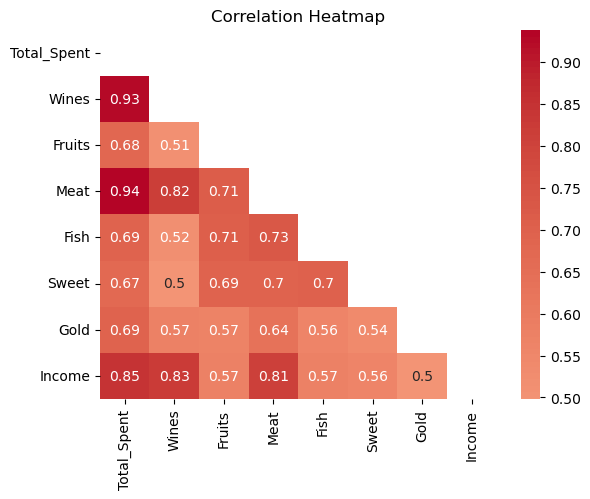

In [90]:
sns.heatmap(data = df_corr, annot=True, cmap='coolwarm', center=0, mask=matriks)

plt.title('Correlation Heatmap')
plt.show()

> ### **Insight** :
- Income memiliki korelasi positif terhadap Total_Spent
- Semakin tinggi income, maka uang yang dikeluarkan untuk membeli suatu produk semakin banyak.
- Produk yang memiliki korelasi positif dan kuat berdasarkan income adalah produk wine dan daging.

### **Minat Produk berdasarkan `Kidhome`**
#### **Jumlah anak kecil di rumah pelanggan yang paling konsumtif**

In [91]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan jumlah anak kecil
df_total_spent_kid = df.groupby('Kidhome')[['Total_Spent']].median().reset_index()
df_total_spent_kid.sort_values('Total_Spent', ascending=False)

,Kidhome,Total_Spent
0,0,902.00
1,1,72.00
2,2,63.00


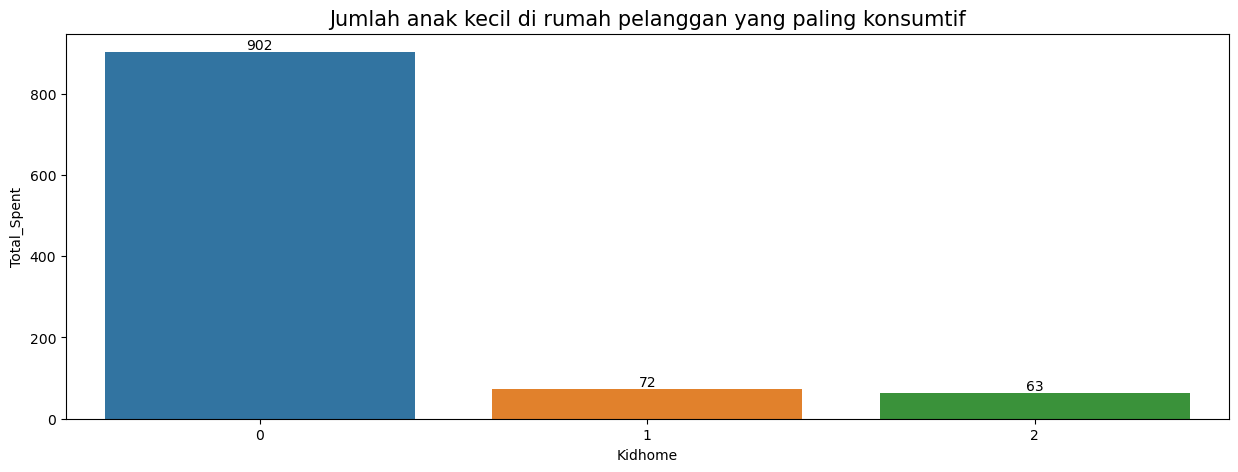

In [92]:
# informasi pelanggan dengan jumlah anak kecil paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Jumlah anak kecil di rumah pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_kid, x='Kidhome', y='Total_Spent', order=df_total_spent_kid.sort_values('Total_Spent', ascending=False).Kidhome)
for i in ax.containers:
            ax.bar_label(i,)

> ### **Insight** :
- Pelanggan yang tidak mempunyai anak kecil menjadi yang paling konsumtif
- pelanggan yang mempunyai anak kecil menjadi yang paling tidak konsumtif baik 1 anak kecil maupun 2 anak kecil berdasarkan uji hipotesis, mediannya tidak berbeda signifikan

Uji Hipotesi Mann-Whitney
Hipotesis :

- Ho : Median 1 anak kecil = median 2 anak kecil
- Ha : Median 1 anak kecil != median 2 anak kecil

In [93]:
# uji hipotesis mann_whitney
stat, pvalue = mannwhitneyu(
    df_total_spent_kid[df_total_spent_kid['Kidhome'] == 1]['Total_Spent'],
    df_total_spent_kid[df_total_spent_kid['Kidhome'] == 2]['Total_Spent'],
    alternative = 'two-sided'
)

if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.

    (Mediannya TIDAK berbeda signifikan)

    TIDAK punya cukup bukti untuk mengatakan bahwa 
    median pelanggan yang mempunyai 1 anak kecil TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak kecil
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.

    (Mediannya berbeda signifikan)

    Terdapat cukup bukti untuk mengatakan bahwa
    median pelanggan yang mempunyai 1 anak kecil TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak kecil
    ''') 


    pvalue = 1.00000. pvalue > 0.05. Gagal menolak Ho.

    (Mediannya TIDAK berbeda signifikan)

    TIDAK punya cukup bukti untuk mengatakan bahwa 
    median pelanggan yang mempunyai 1 anak kecil TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak kecil
    


### **Minat beli produk berdasarkan jumlah `KidHome`**

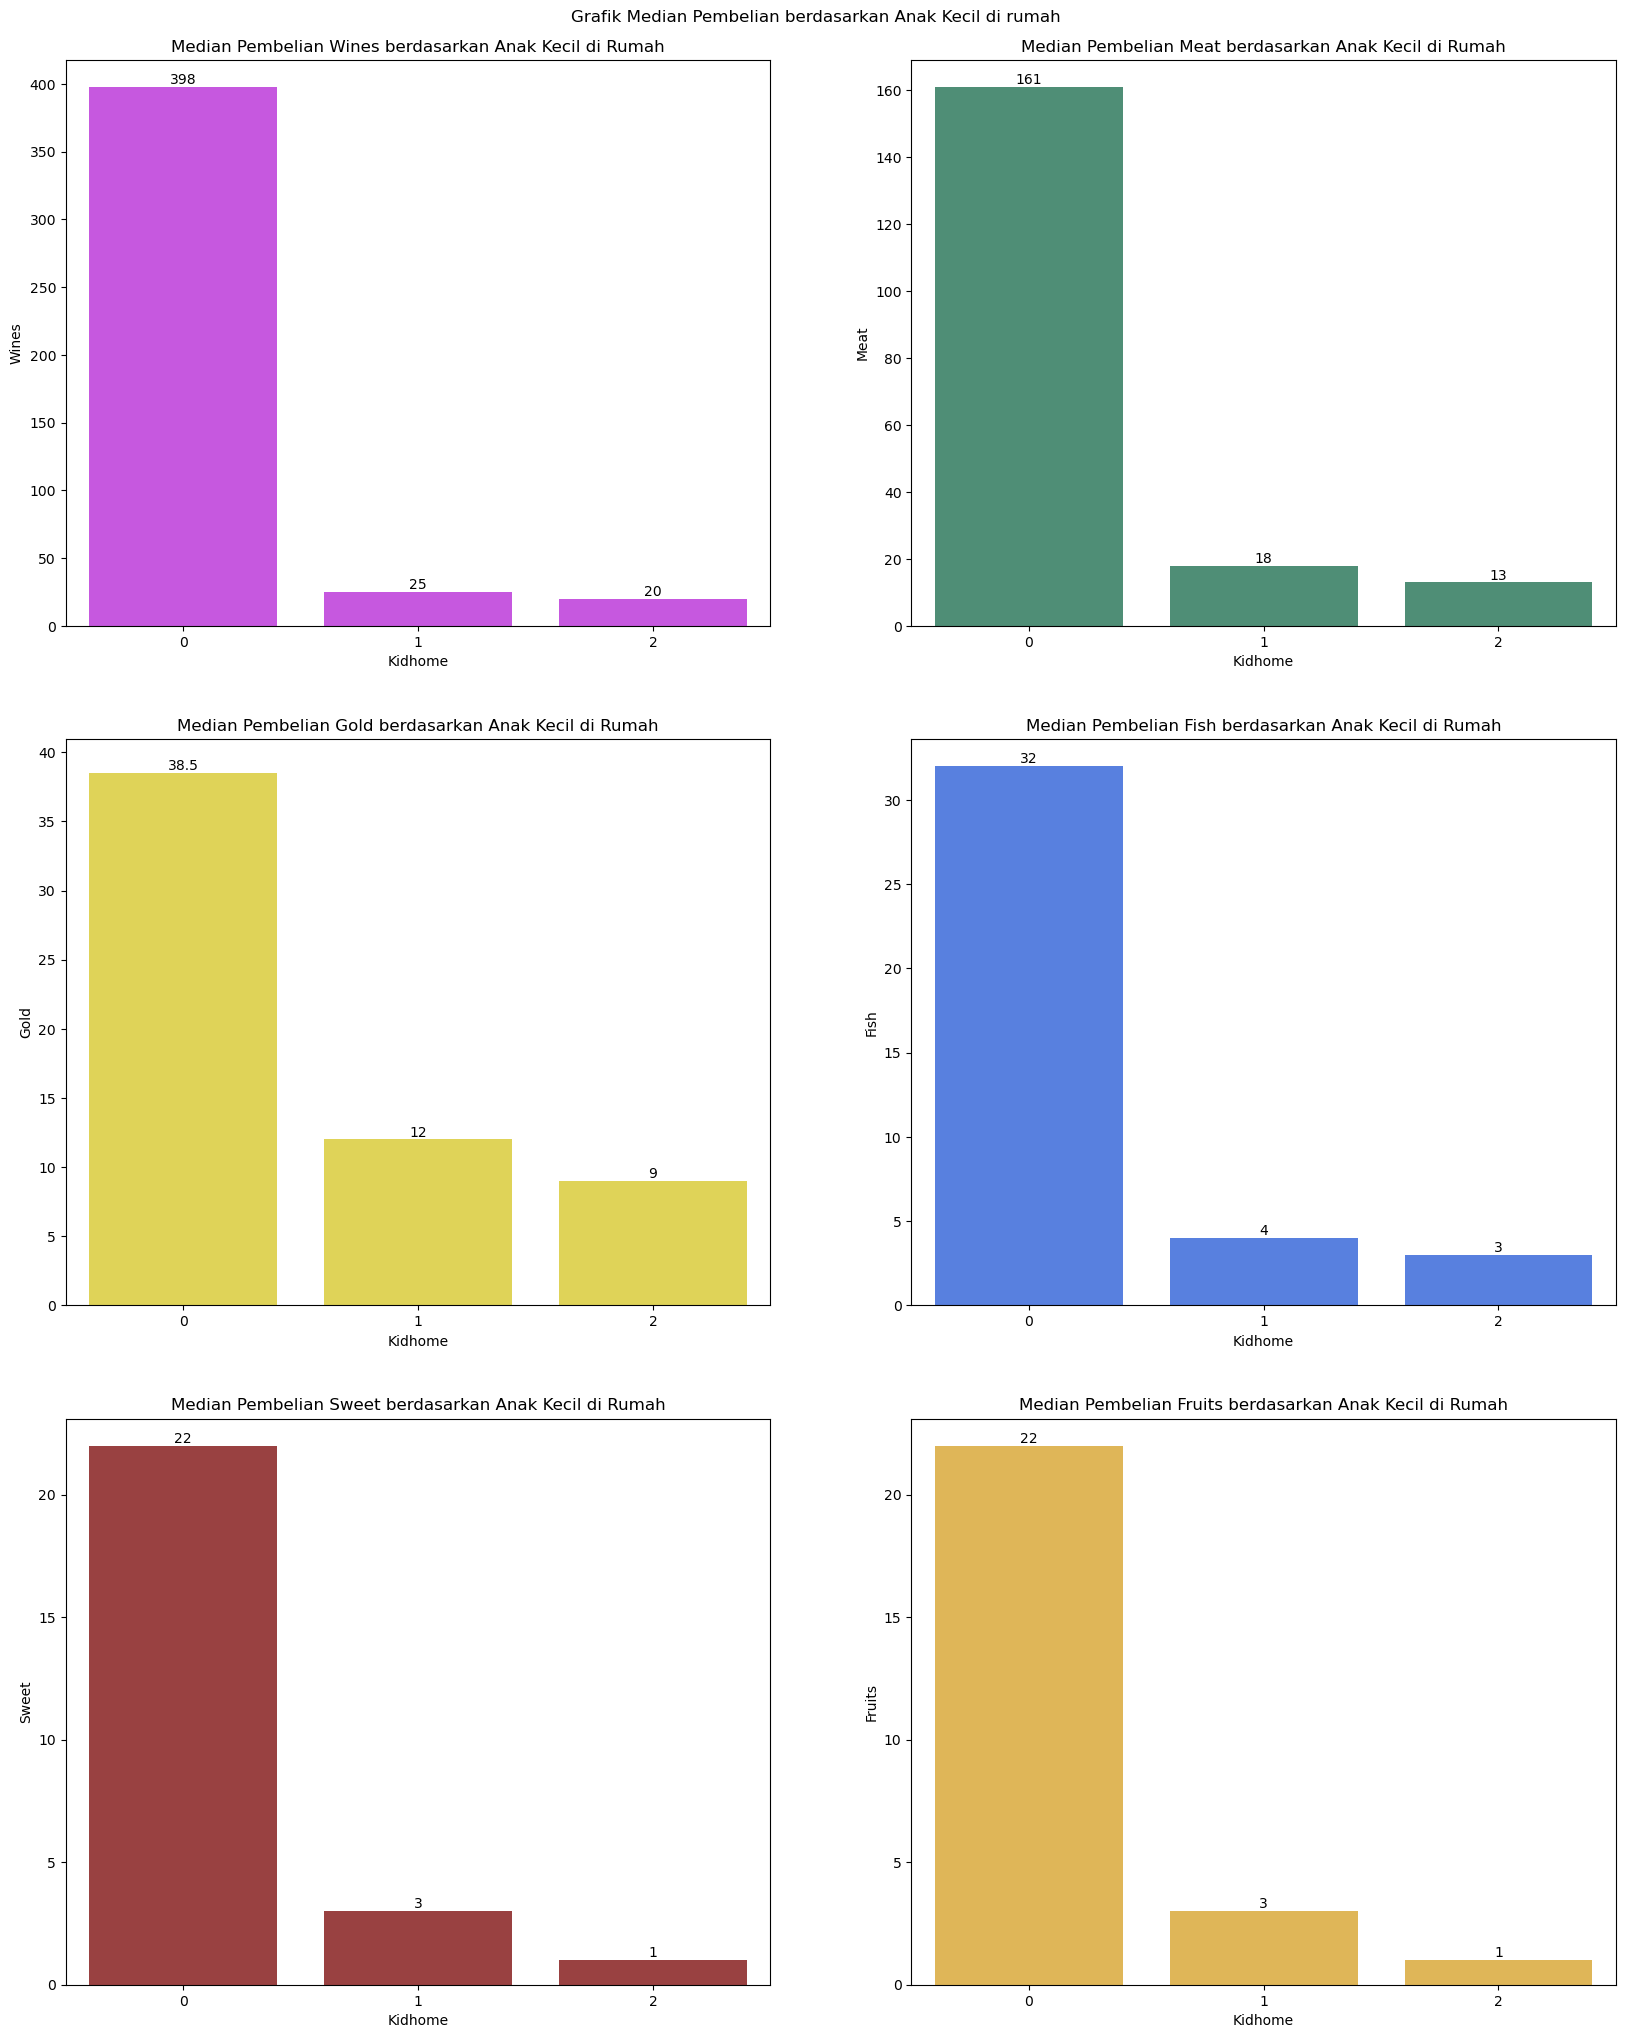

In [94]:
list_product
colors


plt.figure(figsize=(20, 25))

id = 0
n_rows = 3
n_cols = 2

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(
            data=df,
            x='Kidhome', 
            y=list_product[id],
            ci=0,
            estimator=np.median,
            palette=[colors[id]]
        )
        plt.xticks(rotation=0)
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan Anak Kecil di Rumah')
        id += 1
        for container in ax.containers:
            ax.bar_label(container)

plt.suptitle("Grafik Median Pembelian berdasarkan Anak Kecil di rumah", y=0.9)
plt.show()

> ### **Insight** :

Tidak Mempunyai anak kecil di rumah:

- Pelanggan yang tidak mempunyai anak kecil cenderung lebih konsumtif terhadap seluruh produk daripada pelanggan yang tinggal bersama anak kecil di rumahnya

Mempunyai anak kecil di rumah:

- Wines : Produk wine paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil

- Meat : Produk daging paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil 

- Gold : Produk emas paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil

- Fish : Produk ikan paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil

- Sweet : Produk manis paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil

- Fruits : Produk buah-buahan paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak kecil di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak kecil

<div class="alert alert-block alert-info">
Terlihat beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda. Kita akan mencoba uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.
</div>

Hipotesis :

- Ho : Median jumlah anak kecil terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [95]:
list_produk
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Kidhome'] == 1][i],
        df[df['Kidhome'] == 2][i]
        
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak kecil di rumah terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.50734. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk Wines TIDAK berbeda signifikan       
    

    pvalue = 0.00827. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak kecil di rumah terhadap minat pembelian produk Fruits berbeda signifikan
    

    pvalue = 0.05816. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk Meat TIDAK berbeda signifikan       
    

    pvalue = 0.09219. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk Fish TIDAK berbeda signifikan       
    

    pvalue = 0.01694. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak kecil di rumah terhadap minat pembelian produk Sweet berbeda signifikan
    

    pvalue = 0.11105. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak kecil di rumah terhadap minat pembelian produk Gold TIDAK berbeda signifikan     

### **Minat Produk berdasarkan `Teenhome`**
#### **Jumlah anak remaja di rumah pelanggan yang paling konsumtif**

In [96]:
# membuat variable baru yang berisi data pembelian setiap produk berdasarkan jumlah anak remaja
df_total_spent_teen = df.groupby('Teenhome')[['Total_Spent']].median().reset_index()
df_total_spent_teen.sort_values('Total_Spent', ascending=False)

,Teenhome,Total_Spent
2,2,474.50
1,1,395.00
0,0,390.00


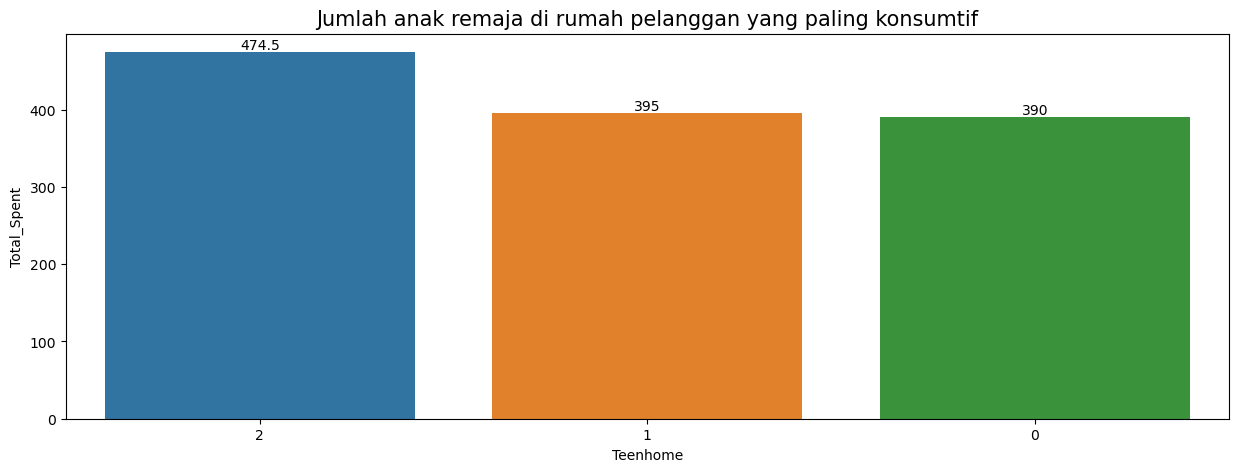

In [97]:
# informasi pelanggan dengan jumlah anak remaja paling konsumtif dalam bentuk barplot
plt.figure(figsize=(15,5))
plt.title('Jumlah anak remaja di rumah pelanggan yang paling konsumtif', size=15)
ax = sns.barplot(df_total_spent_teen, x='Teenhome', y='Total_Spent', order=df_total_spent_teen.sort_values('Total_Spent', ascending=False).Teenhome)
for i in ax.containers:
            ax.bar_label(i,)

> ### **Insight** :
- Tidak berbeda secara signifikan baik mempunyai 1,2 ataupun 0 anak remaja
- Pelanggan yang mempunyai 2 anak remaja di rumahnya menjadi yang paling konsumtif
- pelanggan yang mempunyai 1 anak remaja dan tidak mempunyai anak remaja menjadi yang paling tidak konsumtif dan berdasarkan uji hipotesis, mediannya tidak berbeda signifikan

Uji Hipotesi Mann-Whitney
Hipotesis :

- Ho : Median 1 anak remaja = median 2 anak remaja
- Ha : Median 1 anak remaja != median 2 anak remaja

In [98]:
stat, pvalue = mannwhitneyu(
    df_total_spent_teen[df_total_spent_teen['Teenhome'] == 1]['Total_Spent'],
    df_total_spent_teen[df_total_spent_teen['Teenhome'] == 2]['Total_Spent'],
    alternative = 'two-sided'
)

if pvalue > 0.05 :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.

    (Mediannya TIDAK berbeda signifikan)

    Kita TIDAK punya cukup bukti untuk mengatakan bahwa 
    median pelanggan yang mempunyai 1 anak remaja TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak remaja
    ''')
else :
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil menolak Ho.

    (Mediannya berbeda signifikan)

    Kita punya cukup bukti untuk mengatakan bahwa
    median pelanggan yang mempunyai 1 anak remaja TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak remaja
    ''') 


    pvalue = 1.00000. pvalue > 0.05. Gagal menolak Ho.

    (Mediannya TIDAK berbeda signifikan)

    Kita TIDAK punya cukup bukti untuk mengatakan bahwa 
    median pelanggan yang mempunyai 1 anak remaja TIDAK SAMA dengan median pelanggan yang mempunyai 2 anak remaja
    


### **Minat beli produk berdasarkan jumlah anak remaja**

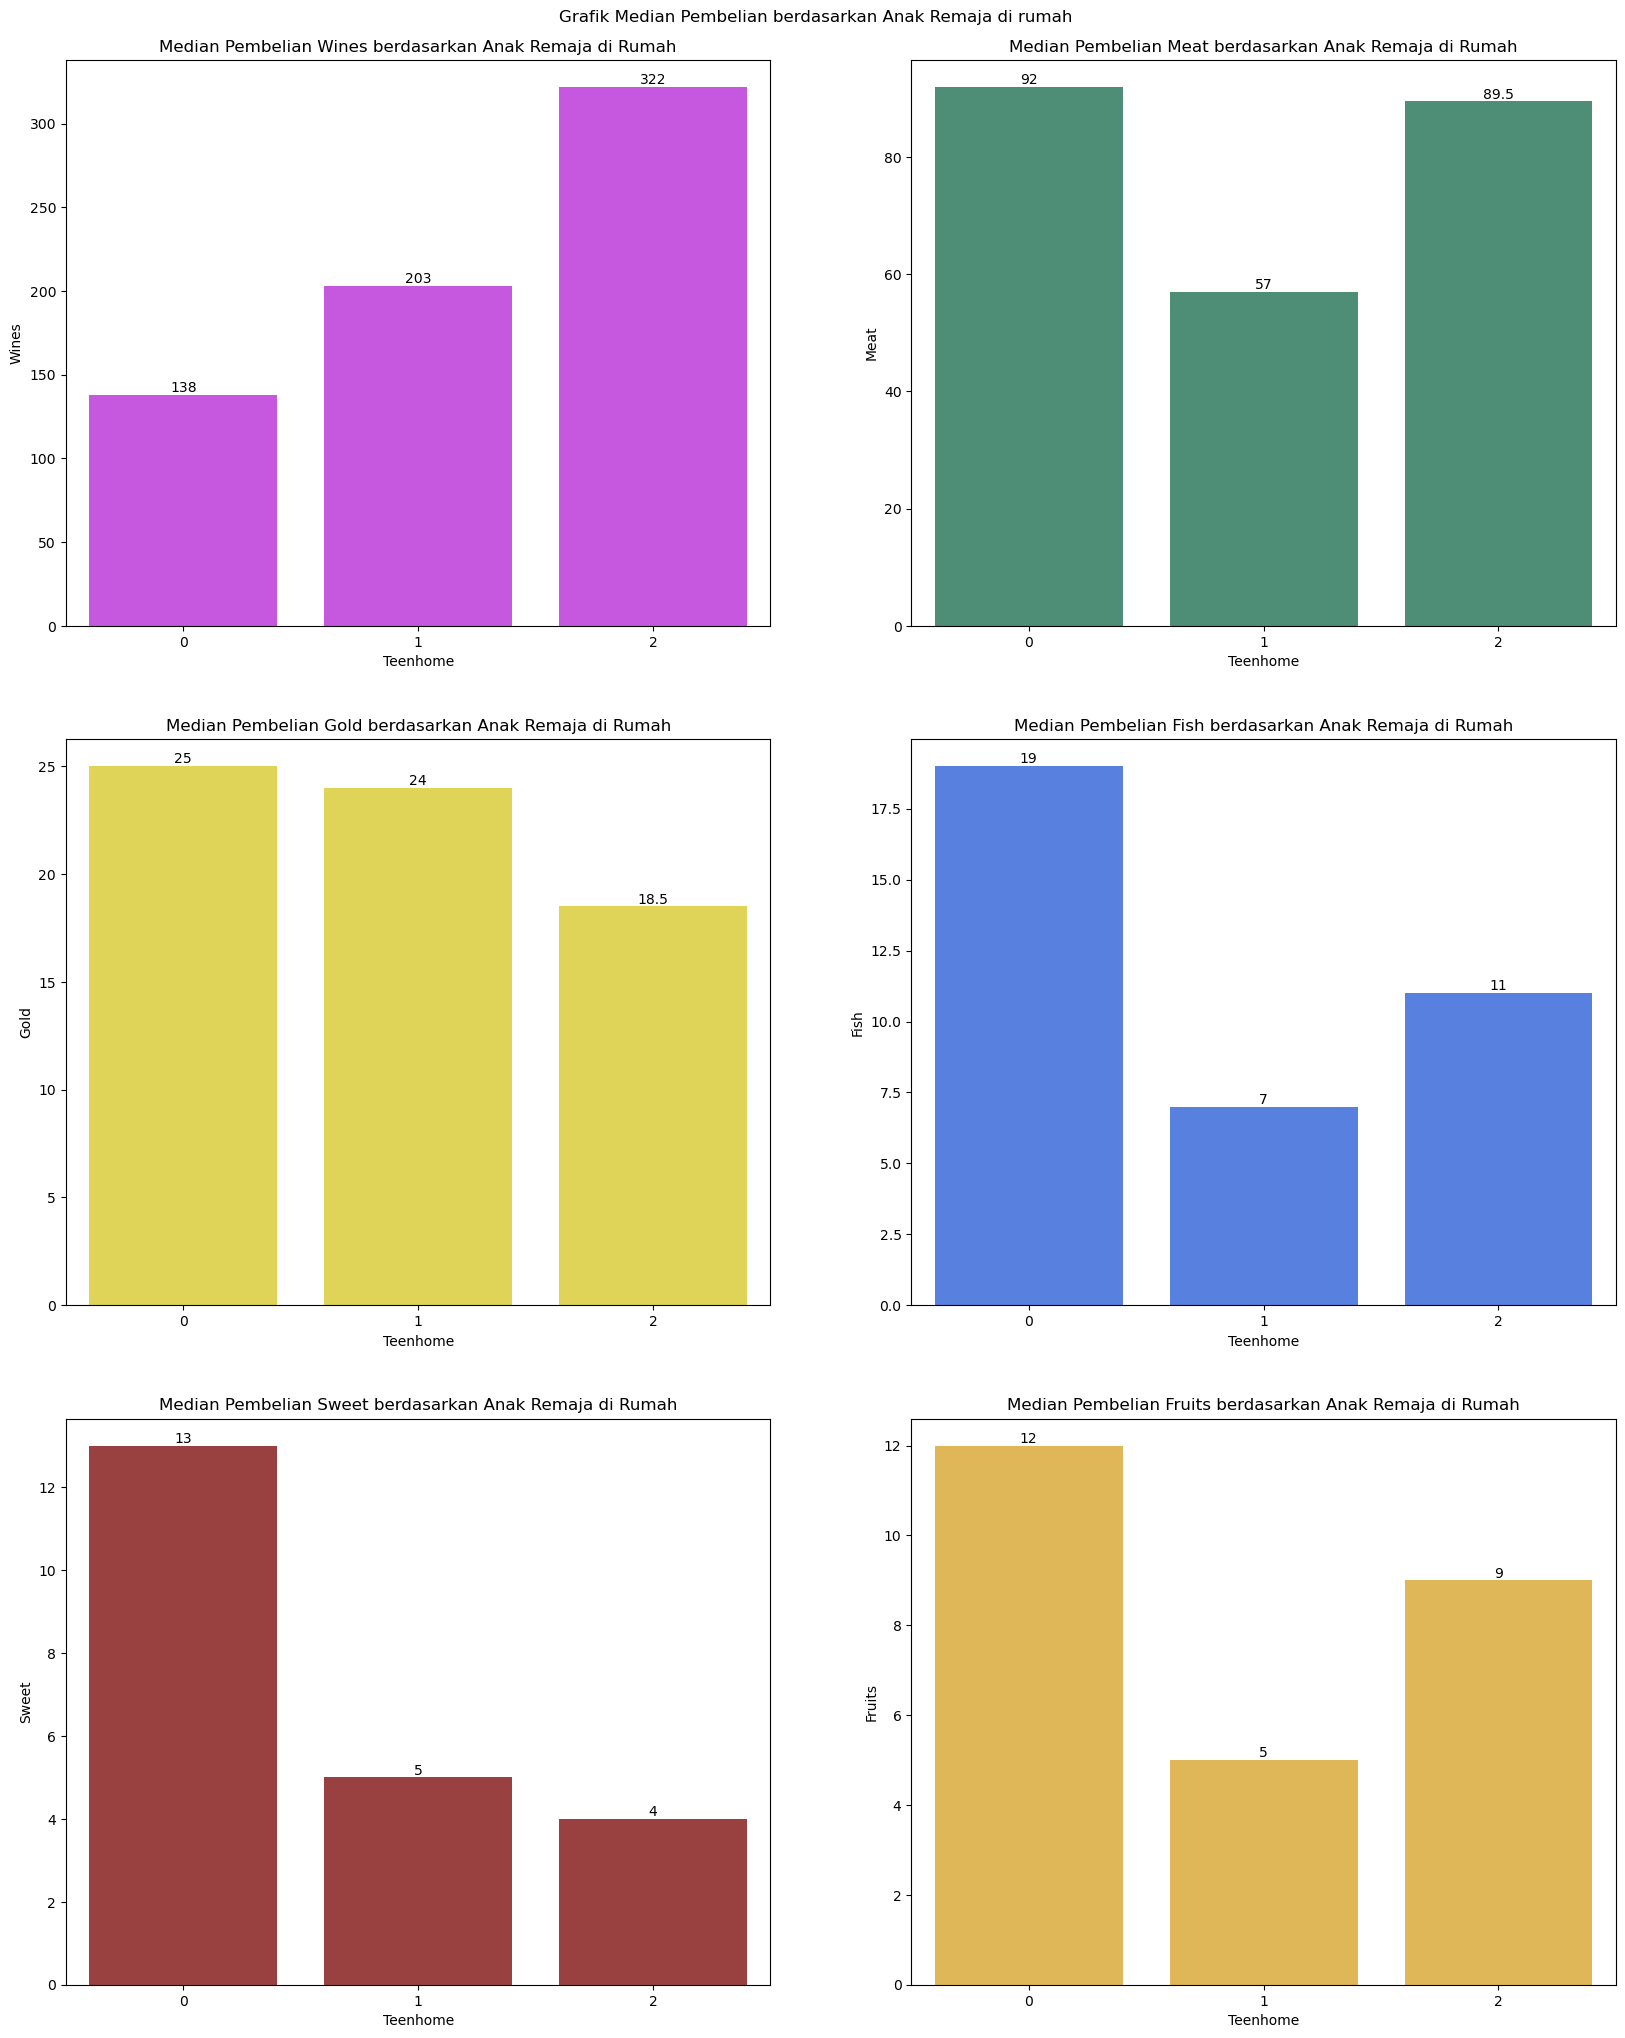

In [99]:
plt.figure(figsize=(20, 25))

id = 0
n_rows = 3
n_cols = 2

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(
            data=df,
            x='Teenhome', 
            y=list_product[id],
            ci=0,
            estimator=np.median,
            palette=[colors[id]]
        )
        plt.xticks(rotation=0)
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan Anak Remaja di Rumah')
        id += 1
        for container in ax.containers:
            ax.bar_label(container)

plt.suptitle("Grafik Median Pembelian berdasarkan Anak Remaja di rumah", y=0.9)
plt.show()

> ### **Insight** :

- Wines : Produk wine paling banyak dibeli oleh pelanggan yang tinggal bersama 2 anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tidak tinggal bersama anak remaja

- Meat : Produk daging paling banyak dibeli oleh pelanggan yang tinggal bersama 2 anak remaja dan pelanggan yang tidak tinggal bersama anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 1 anak remaja 

- Gold : Produk emas paling banyak dibeli oleh pelanggan yang tidak tinggal bersama anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak remaja

- Fish : Produk ikan paling banyak dibeli oleh pelanggan yang tidak tinggal bersama anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 1 anak remaja

- Sweet : Produk manis paling banyak dibeli oleh pelanggan yang tinggal bersama 1 anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 2 anak remaja

- Fruits : Produk buah-buahan paling banyak dibeli oleh pelanggan yang tidak tinggal bersama anak remaja di rumahnya dan paling sedikit dibeli oleh pelanggan yang tinggal bersama 1 anak remaja

<div class="alert alert-block alert-info">
Terlihat beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda. Kita akan mencoba uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.
</div>

Hipotesis :

- Ho : Median jumlah anak remaja terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [100]:
# uji hipotesis menggunakan kruskal wallis
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['Teenhome'] == 0][i],
        df[df['Teenhome'] == 1][i],
        df[df['Teenhome'] == 2][i]
        
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak remaja di rumah terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk Wines berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk Fruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk Meat berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk Fish berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anak remaja di rumah terhadap minat pembelian produk Sweet berbeda signifikan
    

    pvalue = 0.67336. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anak remaja di rumah terhadap minat pembelian produk Gold TIDAK berbeda signifikan     

### **Minat beli produk berdasarkan jumlah member keluarga**

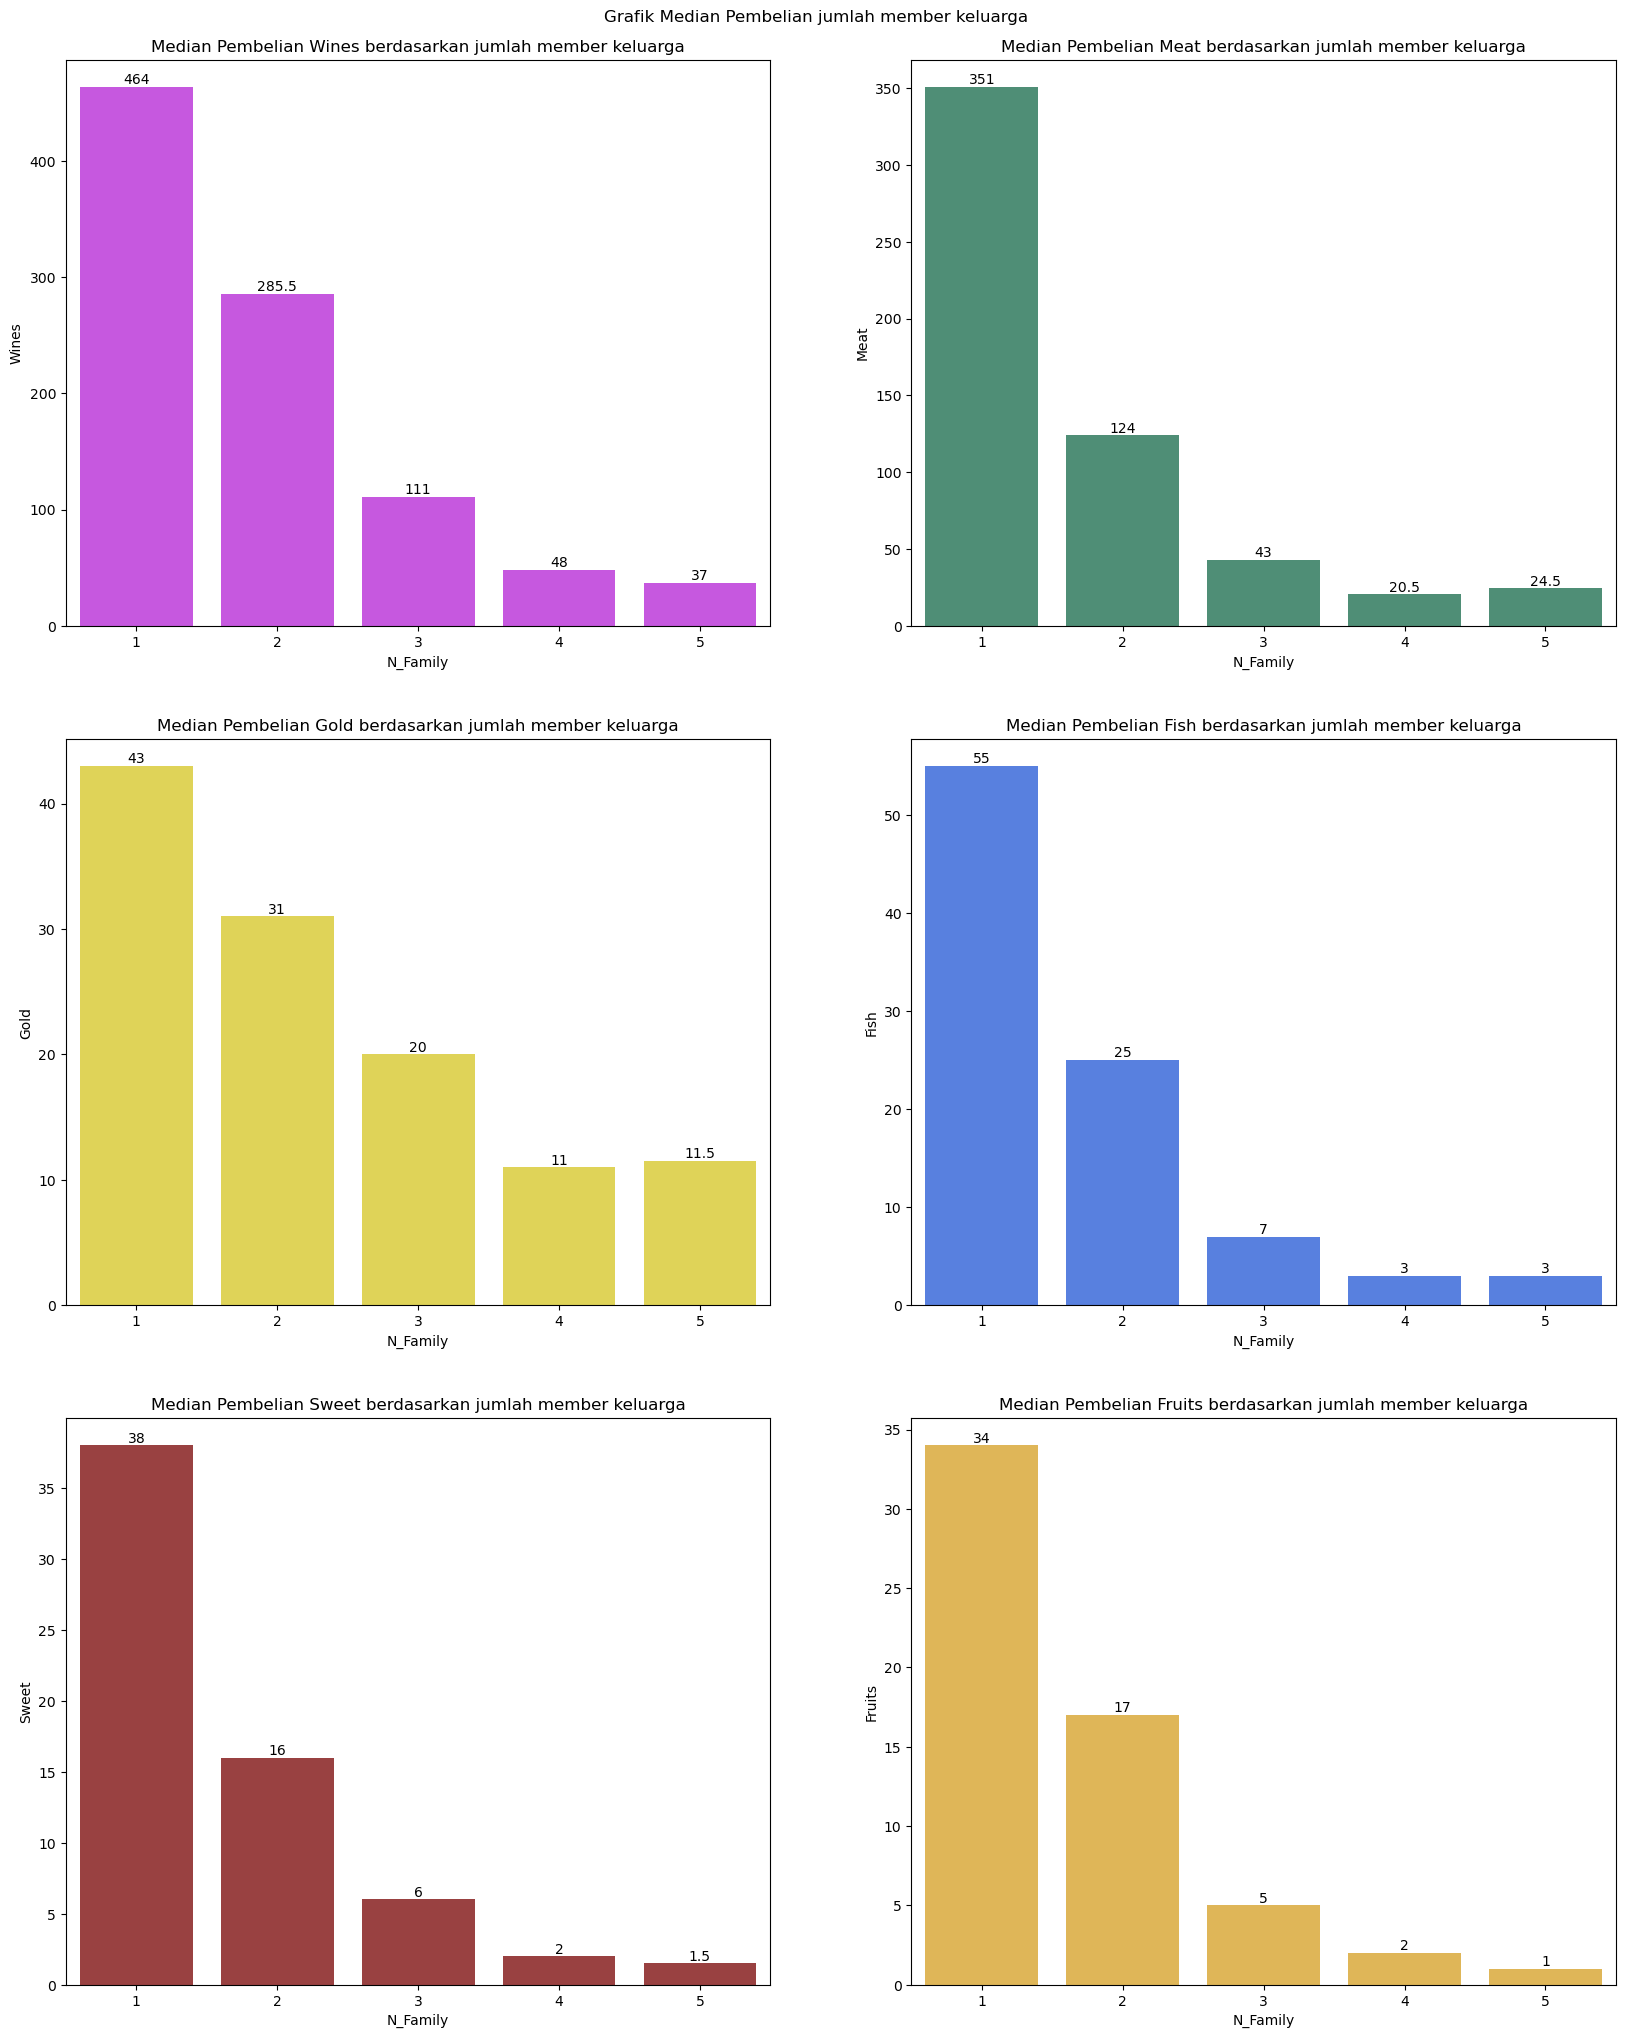

In [101]:
plt.figure(figsize=(20, 25))

id = 0
n_rows = 3
n_cols = 2

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, id + 1)
        ax = sns.barplot(
            data=df,
            x='N_Family', 
            y=list_product[id],
            ci=0,
            estimator=np.median,
            palette=[colors[id]]
        )
        plt.xticks(rotation=0)
        plt.title(f'Median Pembelian {list_product[id]} berdasarkan jumlah member keluarga')
        id += 1
        for container in ax.containers:
            ax.bar_label(container)

plt.suptitle("Grafik Median Pembelian jumlah member keluarga", y=0.9)
plt.show()

> ### **Insight** :
- Semakin banyak jumlah member keluarga, semakin rendah minat beli terhadap produk
- Pelanggan yang tinggal sendiri cenderung lebih konsumtif dibandingkan dengan yang tinggal bersama

<div class="alert alert-block alert-info">
Terlihat beberapa grafik mempunyai median yang perbedaannya tidak jauh berbeda. Kita akan mencoba uji hipotesis untuk mengetahui apakah median berbeda signifikan atau tidak.
</div>

Hipotesis :

- Ho : Median jumlah anggota keluarga terhadap minat pembelian produk sama
- Ha : Minimal ada satu median yang berbeda, tetapi kita tidak tahu yang mana

In [102]:
# uji hipotesis menggunakan kruskal wallis
for i in list_produk:
    stat, pvalue = kruskal(
        df[df['N_Family'] == 1][i],
        df[df['N_Family'] == 2][i],
        df[df['N_Family'] == 3][i],
        df[df['N_Family'] == 4][i],
        df[df['N_Family'] == 5][i]
        
    )

    if pvalue > 0.05 :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal Menolak Ho.
    Median jumlah anggota keluarga terhadap minat pembelian produk {i} TIDAK berbeda signifikan       
    ''')
    else :
        print (f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk {i} berbeda signifikan
    ''')


    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk Wines berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk Fruits berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk Meat berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk Fish berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk Sweet berbeda signifikan
    

    pvalue = 0.00000. pvalue <= 0.05. Berhasil Menolak Ho.       
    Median jumlah anggota keluarga terhadap minat pembelian produk Gold berbeda signifikan
    


## **Analisis Minat Place**

### **Cek Distribusi data**

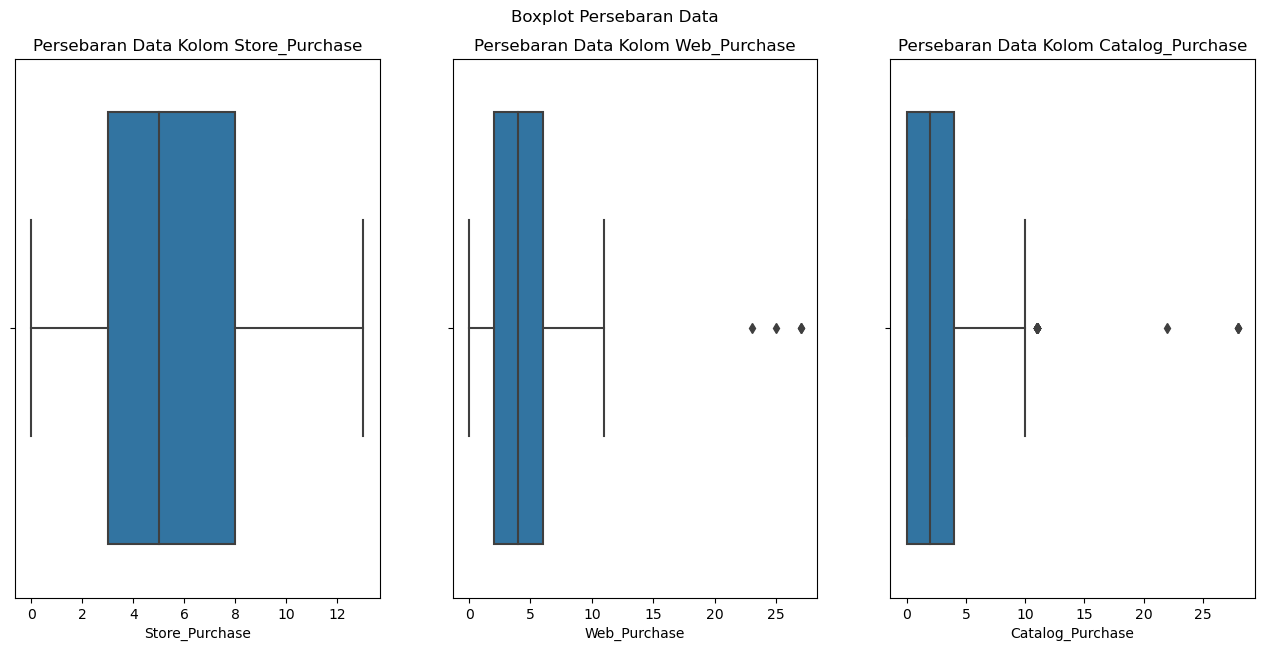

In [103]:
# Melihat persebaran data menggunakan boxplot
list_corr = ['Store_Purchase', 'Web_Purchase', 'Catalog_Purchase']
id = 0
n_rows = 1
n_cols = 3
plt.figure(figsize=(16,7))

for i in range(n_rows) :
    for j in range(n_cols) :
        plt.subplot(n_rows, n_cols, id + 1)
        sns.boxplot(data=df, x = list_corr[id])
        plt.title(f'Persebaran Data Kolom {list_corr[id]}', y=1)
        id += 1

plt.suptitle("Boxplot Persebaran Data", y=0.95)
plt.show()

In [104]:
# Uji normalitas setiap kolom kategori produk dengan normaltest 
list_produk = ['Store_Purchase', 'Web_Purchase', 'Catalog_Purchase']
for i in list_produk:
    stat, pvalue = normaltest(df[i])
    if pvalue > 0.05 :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} terdistribusi normal')
    else :
        print(f'pvalue = {pvalue:.5f}, kita mengasumsikan data pada kolom {i} TIDAK terdistribusi normal')

pvalue = 0.00000, kita mengasumsikan data pada kolom Store_Purchase TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Web_Purchase TIDAK terdistribusi normal
pvalue = 0.00000, kita mengasumsikan data pada kolom Catalog_Purchase TIDAK terdistribusi normal


Secara singkat, kita bisa mengetahui bahwa semua kolom diatas tidak terdistribusi normal, sehingga untuk proses analisis selanjutnya, kita akan menggunakan **median**

### **Tempat transaksi paling banyak**

In [105]:
df_place = df[['Store_Purchase', 'Web_Purchase', 'Catalog_Purchase']].sum()
df_place

Store_Purchase      11865
Web_Purchase        8425 
Catalog_Purchase    5468 
dtype: int64

In [106]:
df_place = pd.DataFrame({
    'Place' : ['Store_Purchase', 'Web_Purchase', 'Catalog_Purchase'],
    'Total' : [12967, 9147, 5962]
})
df_place

,Place,Total
0,Store_Purchase,12967
1,Web_Purchase,9147
2,Catalog_Purchase,5962


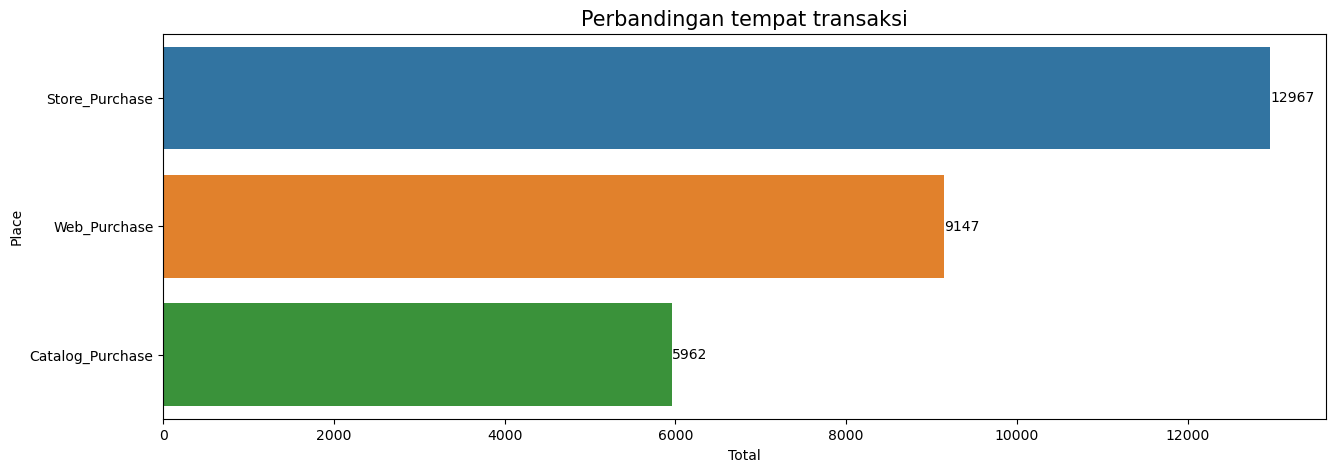

In [107]:
plt.figure(figsize=(15,5))
plt.title('Perbandingan tempat transaksi', size=15)
ax = sns.barplot(df_place, x='Total', y='Place')
for i in ax.containers:
            ax.bar_label(i,)

> ### **Insight** :

- pelanggan lebih banyak melakukan pembelian di Supermarket langsung daripada melalui website atau katalog

### **Analisis efektivitas website**

In [108]:
df_effect_web = df[['Web_Visit', 'Web_Purchase']].median().reset_index()
df_effect_web

,index,0
0,Web_Visit,6.00
1,Web_Purchase,4.00


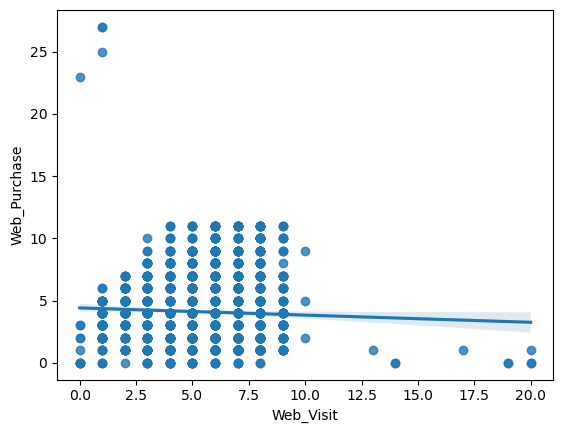

In [109]:
sns.regplot(data=df, x='Web_Visit', y='Web_Purchase')
plt.show()

In [110]:
df[['Web_Visit', 'Web_Purchase']].corr('spearman')

,Web_Visit,Web_Purchase
Web_Visit,1.00,-0.09
Web_Purchase,-0.09,1.00


Secara korelasi, jumlah kunjungan website terhadap pembelian melalui website memiliki korelasi negatif dan lemah. Artinya, kunjungan website tidak berpengaruh terhadap pembelian melalui website

## **Analisis Minat Promo**

### **Promo yang paling banyak diambil**

In [111]:
df_promo = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Latest_Cmp']].sum()
df_promo

AcceptedCmp1    135
AcceptedCmp2    26 
AcceptedCmp3    151
AcceptedCmp4    158
AcceptedCmp5    147
Latest_Cmp      313
dtype: int64

In [112]:
df_promo = pd.DataFrame({
    'Promo' : ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Latest_Cmp'],
    'Total' : [135, 26, 151, 158, 147, 313]
})
df_promo

,Promo,Total
0,AcceptedCmp1,135
1,AcceptedCmp2,26
2,AcceptedCmp3,151
3,AcceptedCmp4,158
4,AcceptedCmp5,147
5,Latest_Cmp,313


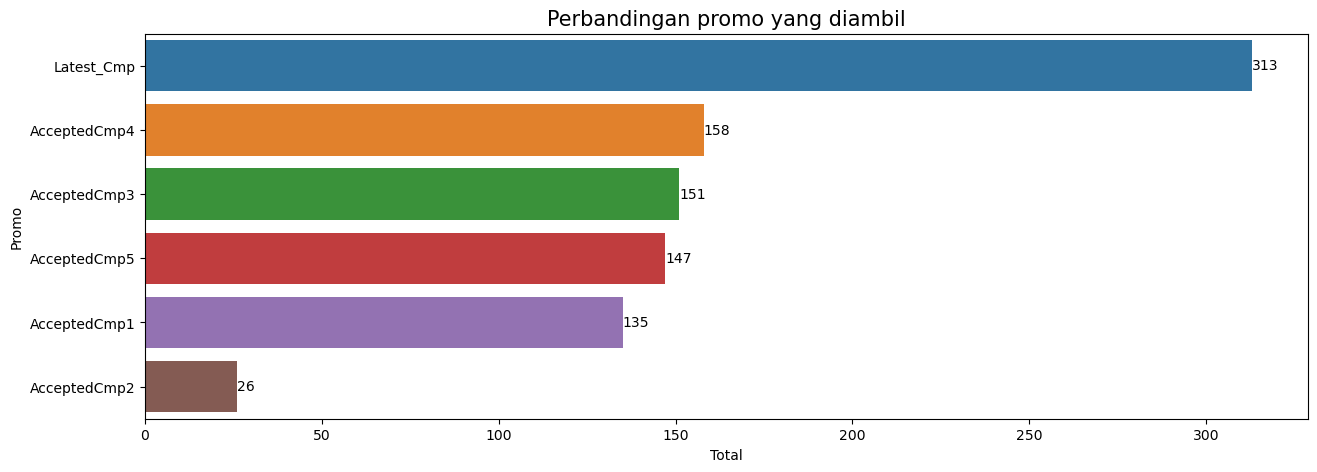

In [113]:
plt.figure(figsize=(15,5))
plt.title('Perbandingan promo yang diambil', size=15)
ax = sns.barplot(df_promo, x='Total', y='Promo', order=df_promo.sort_values('Total', ascending=False).Promo)
for i in ax.containers:
            ax.bar_label(i,)

> ### **Insight** :

- Pelanggan cenderung menerima promosi terakhir dan cenderung mengabaikan promosi ke-2


### **Efektivitas Promosi**

In [114]:
df.sample(5)

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Income,Income_Class,Kidhome,Teenhome,N_Adult,N_Family,Dt_Customer,Month,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spent,Discount_Purchase,Web_Purchase,Catalog_Purchase,Store_Purchase,Web_Visit,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Latest_Cmp,Accept_Promo
1084,6072,1970,44,35-49 (Gen X),Graduate,Single,75345.00,Middle,0,0,1,1,2013-02-02,February,16,918,57,842,99,38,133,2087,1,5,8,6,3,0,0,0,1,0,0,1,2
818,3900,1972,42,35-49 (Gen X),Undergraduate,Partner,65685.00,Middle,0,1,2,3,2014-03-29,March,54,642,14,49,0,7,57,769,1,9,2,9,5,0,0,0,0,0,0,0,0
473,6619,1978,36,35-49 (Gen X),Undergraduate,Partner,38415.00,Low,1,1,2,4,2013-01-02,January,91,22,1,13,4,0,4,44,2,1,0,3,7,0,0,0,0,0,0,0,0
1463,10403,1978,36,35-49 (Gen X),Undergraduate,Partner,16531.00,Low,1,0,2,3,2014-06-18,June,43,2,13,6,7,5,11,44,3,3,0,3,7,0,0,0,0,0,0,0,0
1944,5015,1976,38,35-49 (Gen X),Graduate,Partner,34529.00,Low,1,0,2,3,2012-09-14,September,94,68,6,38,3,6,41,162,2,2,2,3,7,0,0,0,0,0,0,0,0


In [115]:
df_effect_promo = df.groupby('Accept_Promo')[['Total_Spent']].median().reset_index()
df_effect_promo

,Accept_Promo,Total_Spent
0,0,236.50
1,1,769.00
2,2,1188.00
3,3,1536.00
4,4,1690.00
5,5,1676.00


In [116]:
df_effect_promo[['Accept_Promo', 'Total_Spent']].corr('spearman')

,Accept_Promo,Total_Spent
Accept_Promo,1.00,0.94
Total_Spent,0.94,1.00


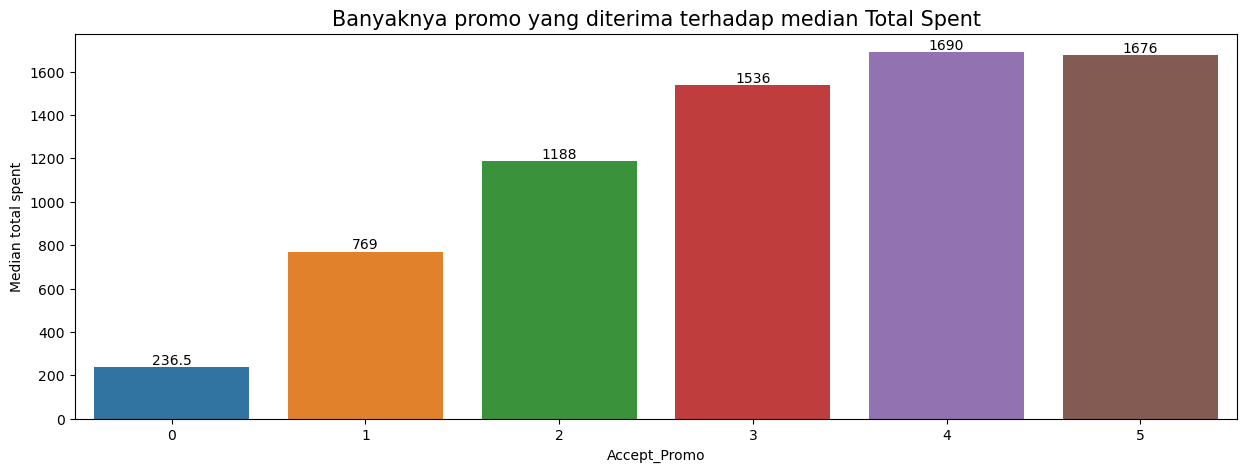

In [117]:
plt.figure(figsize=(15,5))
plt.title('Banyaknya promo yang diterima terhadap median Total Spent', size=15)
ax = sns.barplot(df_effect_promo, x='Accept_Promo', y='Total_Spent', ci=0, estimator='median')
plt.ylabel('Median total spent')
for i in ax.containers:
            ax.bar_label(i,)

> ### **Insight** :

- Promosi berjalan efektif, semakin banyak pelanggan menerima promosi, semakin konsumtif pelanggan tersebut
- Masih ada pelanggan yang tidak menerima promosi sama sekali

## **Analisis kinerja pelayanan**

In [118]:
df_complain = df.groupby('Complain')[['ID']].count().reset_index()
df_complain['Complain_Percentage'] = df_complain['ID'] / len(df) * 100
df_complain['Complain'] = df_complain['Complain'].replace(0, 'Not Complain')
df_complain['Complain'] = df_complain['Complain'].replace(1, 'Complain')
df_complain

,Complain,ID,Complain_Percentage
0,Not Complain,2035,99.07
1,Complain,19,0.93


In [119]:
len(df)

2054

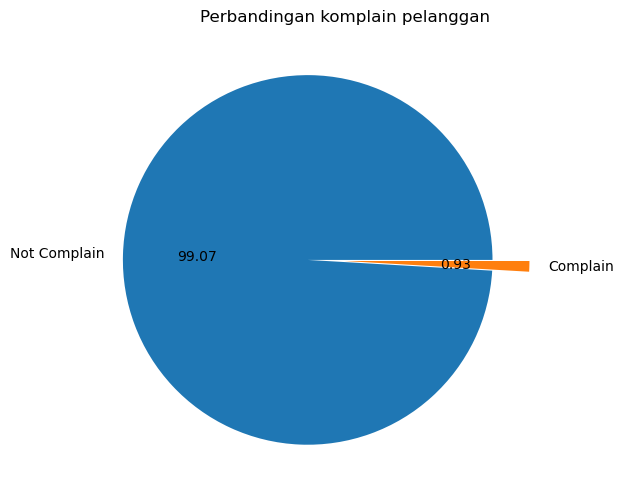

In [120]:
plt.figure(figsize=(8,6))
plt.pie(
    x = df_complain['ID'],  
    labels = df_complain['Complain'],
    autopct= f'%.2f',
    explode=[0.2, 0]       
)
plt.title('Perbandingan komplain pelanggan')
plt.show()

Kinerja pelayanan terhadap pelanggan sejauh ini sangat memuaskan. dari 2240 pelanggan, hanya 21 orang yang mengajukan komplain (sekitar 0.93%)

## **Analisis transaksi pertama pelanggan**

In [121]:
df_month = pd.DataFrame(df['Month'].value_counts().reset_index())
df_month.columns = ['Month', 'count']
df_month

,Month,count
0,August,202
1,March,200
2,May,192
3,October,192
4,January,187
5,September,176
6,November,174
7,April,167
8,December,163
9,February,159


In [122]:
df_month = df_month.reindex([4,8,3,7,1,10,11,0,5,2,6,9], axis=0).reset_index(drop=True)
df_month

,Month,count
0,January,187
1,December,163
2,October,192
3,April,167
4,March,200
5,June,148
6,July,94
7,August,202
8,September,176
9,May,192


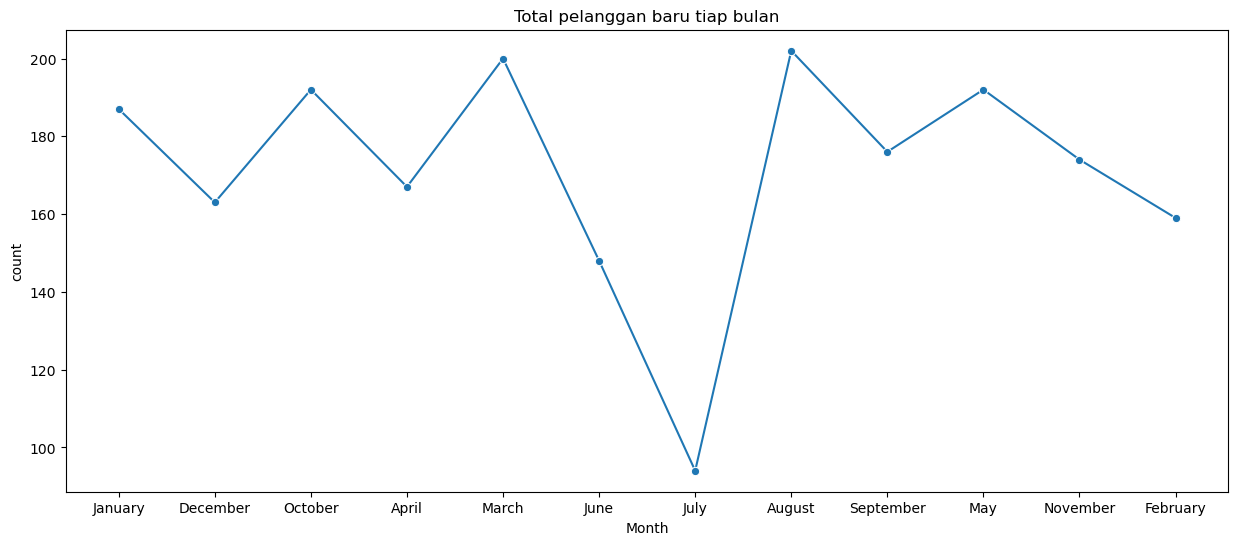

In [123]:
plt.figure(figsize=(15,6))
ax = sns.lineplot(
    data = df_month,
    x = 'Month',
    y = 'count',
    ci = 90,
    marker = 'o'
)

plt.title('Total pelanggan baru tiap bulan')
plt.show()

> ### **Insight** :
- Bulan Agustus menjadi bulan dengan pelanggan baru terbanyak
- Bulan Juli menjadi bulan dengan penggan baru paling sedikit
- Terjadi peningkatan yang signifikan dari bulan Juli ke Agustus

## **5. Kesimpulan Analisis**

## General

- Pelanggan paling banyak membeli produk wine dan daging (meat) dalam 2 tahun terakhir

- Pelanggan paling sedikit membeli produk manisan (sweet) dan buah-buahan (fruit) dalam 2 tahun terakhir
<br><br>
- Berdasarkan Age_Group :
    - Generasi Traditional menjadi yang paling konsumtif disusul dengan Generasi Boomer
    - Generasi muda (Gen X dan Gen Y) menjadi yang paling tidak konsumtif
<br><br>
- Berdasarkan Marital_Status :
    - Pelanggan baik status single maupun partner sama-sama konsumtif.
<br><br>
- Berdasarkan Education :
    - Tingkat pendidikan Graduate menjadi yang paling konsumtif dibandingkan Undergraduate
<br><br>
- Berdasarkan Income_Class :
    - Income Class Middle menjadi yang paling konsumtif disusul dengan Income Class Upper
    - Income Class Low menjadi yang paling tidak konsumtif
<br><br>
- Berdasarkan Kidhome :
    - Pelanggan yang tidak mempunyai anak kecil menjadi yang paling konsumtif
    - pelanggan yang mempunyai anak kecil menjadi yang paling tidak konsumtif baik 1 anak kecil maupun 2 anak kecil
<br><br>
- Berdasarkan Teenhome :
    - Pelanggan yang mempunyai 2 anak remaja di rumahnya menjadi yang paling konsumtif dengan median total pembelian 458.5 dollar
    - pelanggan yang mempunyai 1 anak remaja dan tidak mempunyai anak remaja menjadi yang paling tidak konsumtif
<br><br>
- Berdasarkan N_Family :
    - Semakin banyak anggota keluarga, semakin rendah minat beli terhadap produk
    - Pelanggan yang tinggal sendiri lebih konsumtif dibandingkan dengan yang tinggal bersama
<br><br>
- Berdasarkan Place :
    - pelanggan lebih banyak melakukan pembelian di Supermarket langsung daripada melalui website atau katalog
<br><br>
- Berdasarkan Promosi :
    - Promosi berjalan efektif, semakin banyak pelanggan menerima promosi, semakin konsumtif pelanggan tersebut
<br><br>
- Berdasarkan Kinerja :
    - Kinerja pelayanan terhadap pelanggan sejauh ini sangat memuaskan. Dari 2239 pelanggan, hanya 21 orang yang mengajukan komplain (sekitar 0.93%). Tapi kinerja pelayanan itu dirasa perlu terus dipertahankan bahkan ditingkatkan agar konsumen bisa tetap loyal terhadap Supermarket kita.
<br><br>
- Berdasarkan Transaksi pertama pelanggan :
    - Bulan Agustus menjadi bulan dengan pelanggan baru terbanyak
    - Bulan Juli menjadi bulan dengan penggan baru paling sedikit
    - Terjadi peningkatan yang signifikan dari bulan Juli ke Agustus

## Karakteristik Pelanggan Berdasarkan Produk
**Wines** 

- Age Group: Traditionalist & Boomers.
- Status: Tidak ada perbedaan signifikan dalam pembelian wine baik single maupun partner.
- Education: Graduate
- Income Class: Middle & Upper
- Kid home: 1
- Teen home: 2
- Anggota Keluarga: Semakin sedikit jumlah member keluarga, semakin tinggi minat beli

**Meat** 

- Age Group: Generasi Traditionalist.
- Status Single
- Education: Undergraduate
- Income Class: Upper
- Kid home: 1
- Teen home: 2
- Anggota Keluarga: Semakin sedikit jumlah member keluarga, semakin tinggi minat beli

**Gold**

- Age Group: Generasi Boomers.
- Status Single
- Education: Undergraduate
- Income Class: Middle
- Kid home: 1
- Teen home: 0
- Anggota Keluarga: Semakin sedikit jumlah member keluarga, semakin tinggi minat beli



**Fish**

- Age Group: Generasi Traditionalist.
- Status: Tidak ada perbedaan signifikan dalam pembelian produk ikan baik single maupun partner.
- Education: Undergraduate
- Income Class: Middle
- Kid home: 1
- Teen home: 0
- Anggota Keluarga: Semakin sedikit jumlah member keluarga, semakin tinggi minat beli



**Sweet**

- Age Group: Generasi Y.
- Status: Tidak ada perbedaan signifikan dalam pembelian produk ikan baik single maupun partner.
- Education: Undergraduate
- Income Class: Middle
- Kid home: 1
- Teen home: 1
- Anggota Keluarga: Semakin sedikit jumlah member keluarga, semakin tinggi minat beli



**Fruits** 

- Age Group: Generasi Traditionalist.
- Status: Single
- Education: Undergraduate
- Income Class: Middle
- Kid home: 1
- Teen home: 0
- Anggota Keluarga: Semakin sedikit jumlah member keluarga, semakin tinggi minat beli

---

## **6. Rekomendasi**

- Secara umum, pelanggan JAYA SUPERMARKET adalah genereasi **Traditional dan Boomers**, yaitu umur 50-87 tahun. JAYA SUPERMARKET dapat **memperbanyak pilihan produk yang sehat dan alami**
<br><br>
- Pelanggan paling banyak **berbelanja langsung di toko** dibandingkan web atau katalog. Maka dari itu JAYA SUPERMARKET bisa memperhatikan **kebersihan tempatnya atau merenovasi agar lebih nyaman untuk berbelanja**. 
<br><br>
- 10 konsumen paling banyak membeli produk JAYA SUPERMARKET bisa diberikan reward khusus sebagai apresiasi karena telah menjadi *loyal customer* Supermarket.
<br><br>
- Jika JAYA SUPERMARKET ingin meluncurkan produk baru berdasarkan kategori produk yang paling diminati, maka disarankan untuk membuat produk dari kategori **Wine**
<br><br>
- Mayoritas pembeli di JAYA SUPERMARKET adalah pelanggan dari genereasi **Traditional dan Boomers**, yaitu umur 50-87 tahun. Disarankan JAYA SUPERMARKET bisa membuat produk Wine yang **lebih sehat dan alami**.
<br><br>
- Dengan income class **Middle** dan **Upper**, JAYA SUPERMARKET bisa membuat dua kategori produk wine: **Regular & Premium**
<br><br>
- Untuk pemasaran produk baru Wine, JAYA SUPERMARKET bisa menawarkan promosi bundling dengan produk **Meat** karena memiliki kesamaan karakteristik
<br><br>
- Berdasarkan data, **promosi sebaikanya dilakukan langsung melalui toko** dengan menerapkan strategi seperti **campaign terakhir**, serta dilakukan **setelah bulan Juli**, karena pada saat itu juga banyak customer baru.

In [124]:
# xls_filename = 'Supermarket_Customer_Clean_Data.xlsx'
# df.to_excel('Supermarket_Customer_Clean_Data.xlsx', index=False)